<br>



<a id="imports"></a>

<h1 style="font-family: Verdana; font-size: 30px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 1px; background-color: #ffffff; color: #03045e;" id="imports">&nbsp;&nbsp;Multimodal Single-Cell Integration&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>


![](https://storage.googleapis.com/kaggle-competitions/kaggle/38128/logos/thumb76_76.png?t=2022-08-16-19-03-34)

* [Imports](#section-1)
* [Helper Function](#section-1.1)
* [EXPLORE META DATA](#section-2)
* [EXPLORE EVALUATION DATA](#section-2.1)
* [EXPLORE CITEseq Data](#section-3)
* [Extra Info About HDF5 FILE](#section-3.1)
* [EXPLORATION IN CITEseq Train Data](#section-4)
* [Explore Target Data of CITEseq](#section-4.1)
* [Relationship of Gene and Protein](#section-4.2)
* [SVD](#section-5)
* [EXPLORATION IN CITEseq Test Data](#section-5.1)
* [Data Leak](#section-5.2)

<br>

<a id="imports"></a>

<h1 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 1px; background-color: #94d2bd; color: #03045e;" id="imports">&nbsp;&nbsp;IF YOU FIND THIS HELPFUL, PLEASE UPVOTE IT ✌ &nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

As I inspired from One Kernel and used them as a Reference to create this Kernel. I put my all work to Elaborate Every bit of the Data . If you Upvote this Kernel, then Should upvote this one:

[First Reference](https://www.kaggle.com/code/ambrosm/msci-eda-which-makes-sense)

## **======= I N T E R P R E T A T I O N =======**

<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">GOAL OF THIS COMPETITION</b>

The goal of this competition is to predict <b><mark> how DNA, RNA, and protein measurements co-vary in single cells as bone marrow stem cells develop into more mature blood cells</mark></b>.

<br>

<a id="imports"></a>

<h1 style="font-family: Verdana; font-size: 15px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 1px; background-color: #ffffff; color: #03045e;" id="imports">&nbsp;&nbsp;DNA --> RNA-->Protein:&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>


![](https://openproblems.bio/media/learning/central-dogma-large.png)


## **=========== E X P L A N A T I O N 🧬==========**

DNA defines an organism. Indeed, you can change the species of a bacteria through genome transplantation. However, DNA is not functional. It contains a set of instructions that must be converted into RNA and then into protein. For most purposes, you can think of RNA as a messenger between DNA and protein. DNA is made up of genes that contain instructions on how to make proteins. Proteins are responsible for carrying out biological functions in the cell, such as metabolising glucose to create energy for the cell. Generally speaking, each protein in your body is encoded by a single gene.

Although all of cells in your body contain the same genome, the same set of DNA, these trillions carry out very different biological functions. The differences between an immune cell, a neuron, or a muscle cell is defined by which genes are turned on or off within those cells. When a gene is turned on, more copies of RNA are created, thereby increasing the production of protein. We know that regulation of the amount of protein both happens at the level of transcription <b><mark> (DNA -> RNA) and translation (RNA -> protein)<b/><mark/>.

    
#### **Multimodal single-cell data:**
    
In Multimodal single-cell data, we can now directly observe two layers of genetic information in the same cells. This provides an opportunity to use the fact these two sets of data were observed co-occurring in the same cells as ground truth. This is akin to the way that access to the same sentiment expressed in two languages provides ground truth for machine translation.
    
    

<br>

<a id="imports"></a>

<h1 style="font-family: Verdana; font-size: 15px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 1px; background-color: #ffffff; color: #0096c7;" id="imports">&nbsp;&nbsp;Pearson Correlation Coefficient&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>    
    
<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">GENERAL EVALUATION INFORMATION</b>
    
The Submissions of this Competition are evaluated on the <b><a href="https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/">Pearson's Correlation Coefficient</a></b> between the ground truth and the predictions.
    
**About:**

The Pearson correlation coefficient (r) is the most common way of measuring a linear correlation. It is a number between –1 and 1 that measures the strength and direction of the relationship between two variables.
    
    
**Working:**
    
The Pearson correlation coefficient also tells you whether the slope of the line of best fit is negative or positive. When the slope is negative, r is negative. When the slope is positive, r is positive.
    
![](https://cdn.scribbr.com/wp-content/uploads/2022/07/Perfect-positive-correlation-Perfect-negative-correlation.webp)
    
    
**When r is greater than .5 or less than –.5, the points are close to the line of best fit:**
    
![](https://cdn.scribbr.com/wp-content/uploads/2022/05/Strong-positive-correlation-and-strong-negative-correlation.webp)
    
    
#### **F O R M U L A**
    
* x and y are two variables and n is the total number of points
    

    
![](https://cdn.scribbr.com/wp-content/ql-cache/quicklatex.com-a916dc6277f04e962bf89d6e60f745ec_l3.png)

<br>

<a id="section-1"></a>

<h1 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 1px; background-color: #ffffff; color: #03045e;" id="imports">&nbsp;&nbsp;IMPORTS&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

Kernel Colors Used : 
['#03045e', '#005f73', '#023e8a', '#0077b6', '#0096c7', '#ade8f4', '#94d2bd', '#2b2d42']


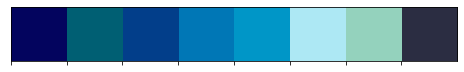

In [1]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from sklearn.decomposition import TruncatedSVD
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import warnings
import os
import gc


class clr:
    S = '\033[1m' + '\033[94m'
    E = '\033[0m'
    
using_colors = ['#03045e','#005f73','#023e8a',
                '#0077b6','#0096c7','#ade8f4',
                '#94d2bd','#2b2d42']

print(clr.S+"Kernel Colors Used : "+clr.E)
palette = list((sns.color_palette(using_colors).as_hex()))
print(palette)
sns.palplot(sns.color_palette(using_colors))
plt.show()

In [2]:
MAIN_DIRECT = '../input/open-problems-multimodal'
meta_data_path = os.path.join(MAIN_DIRECT + '/metadata.csv')
eval_data_path  = os.path.join(MAIN_DIRECT + '/evaluation_ids.csv')
submission_path = os.path.join(MAIN_DIRECT + '/sample_submission.csv')

test_cite_path = os.path.join(MAIN_DIRECT + '/test_cite_inputs.h5')
test_cite_path_day2 = os.path.join(MAIN_DIRECT + '/test_cite_inputs_day_2_donor_27678.h5')
test_multi_path = os.path.join(MAIN_DIRECT + '/test_multi_inputs.h5')


train_cite_path = os.path.join(MAIN_DIRECT + '/train_cite_inputs.h5')
train_cite_target_path = os.path.join(MAIN_DIRECT + '/train_cite_targets.h5')
train_multi_path = os.path.join(MAIN_DIRECT + '/train_multi_inputs.h5')
train_multi_target_path = os.path.join(MAIN_DIRECT + '/train_multi_targets.h5')

## 🦾 **Helper Function**
<a id="section-1.1"></a>

In [3]:
# Reference the function from the kernel of Andrada OLteanu, she done a great job and If you want to know one of
# the best visualizations in Kaggle , Do Check her kernels.

# This function used to show the values on the visualization of bar chart. it prints the values of every 
# bar on the top of the bar. bars are vertical that's why we set h_v = v. 
def show_values_on_bars(axs, h_v="v", space=0.4):

    
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, format(value, ','), ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, format(value, ','), ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        

def print_info(df,name):
    print(clr.S+f"=== {name} == "+clr.E)
    print(clr.S+f"There are {df.isnull().sum().sum()} Missing Values "+clr.E)
    print(clr.S+f"Shape of data is : {df.shape}"+clr.E)
    print(clr.S+f"Columns: {df.columns} \n"+clr.E)
    print(clr.S+"\n========== DATA =========\n\n"+clr.E)
    display(df.head())

<br>

<a id="section-2"></a>

<h1 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 1px; background-color: #ffffff; color: #03045e;" id="imports">&nbsp;&nbsp;EXPLORE DATA&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

In [4]:
meta_data = pd.read_csv(meta_data_path)
print_info(meta_data,'Meta Data')

=== Meta Data == 
There are 0 Missing Values 
Shape of data is : (281528, 5)
Columns: Index(['cell_id', 'day', 'donor', 'cell_type', 'technology'], dtype='object') 


========== DATA =========




,cell_id,day,donor,cell_type,technology
0,c2150f55becb,2,27678,HSC,citeseq
1,65b7edf8a4da,2,27678,HSC,citeseq
2,c1b26cb1057b,2,27678,EryP,citeseq
3,917168fa6f83,2,27678,NeuP,citeseq
4,2b29feeca86d,2,27678,EryP,citeseq


### 🧬 Key Points:


* There are 5 unique days, day 2,3,4,7 and 10, which is clearly explained in the data description. 

* There are two technology used : CITESEQ and MULTIOME.

* **For the Multiome samples: given chromatin accessibility(DNA), predict gene expression(RNA).**

* **For the CITEseq samples: given gene expression(RNA), predict protein levels(DNA).**


* For the Multiome samples, the training set comprises samples only from days 2, 3, 4, and 7. The public test set comprises samples only from days 2, 3, and 7. The private test set comprises data only from day 10.

* For the CITEseq samples, the training set comprises samples only from days 2, 3, and 4. The public test set also comprises samples only from days 2, 3, and 4. The private test set comprises samples only from day 7. There are no day 10 CITEseq samples in any split.

* There are 8 cell types. one type named is "hidden"

* Ok see the column named "cell_id", this is a unique column which containe unique cell ids, this means that every single cell is used in a single day because every cell_id have one day only, it did not repeat that cell_id : 00000 used on day 2 and 3. Nope ❌

* We create dummy columns for categorical columns, then assign them binary numbers (1 and 0) to tell the model that this specific data is here or not.


([], [])

<Figure size 1008x1152 with 0 Axes>

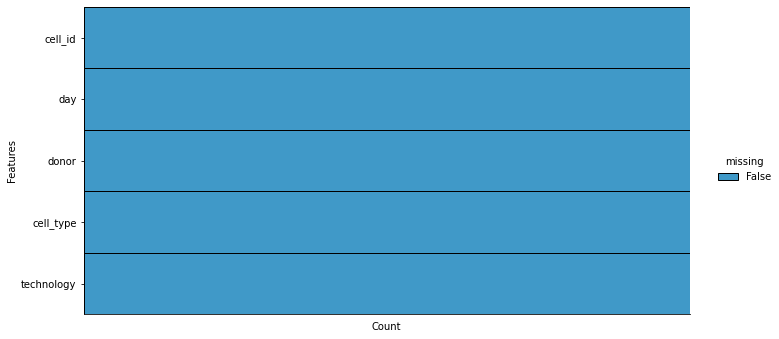

In [5]:
plt.figure(figsize=(14,16))
graph = sns.displot(data=meta_data.isna().melt(value_name='missing'), y='variable',hue='missing',aspect=2.0,multiple='fill',palette=[using_colors[3]])
graph.set(ylabel='Features')
plt.xticks([])

#### **I N T E R P R E T A T I O N** 

* Most of the cells have multiome technology.


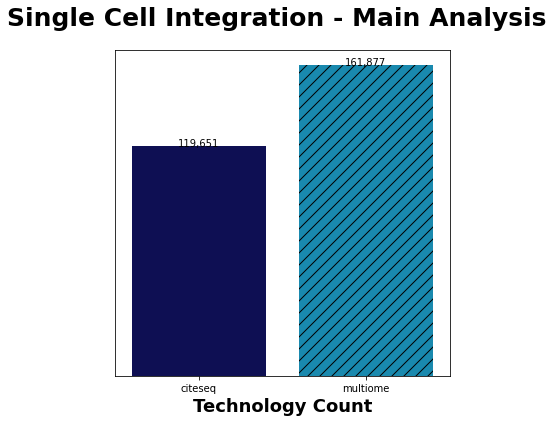

In [6]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle('Single Cell Integration - Main Analysis', 
             weight="bold", size=25)

sns.countplot(data=meta_data, x="technology", ax=ax1, palette=[using_colors[0], using_colors[4]])
show_values_on_bars(ax1, h_v="v", space=0.4)
ax1.set_xlabel("Technology Count", size = 18, weight="bold")
ax1.set_ylabel("")
ax1.set_yticks([])

hatches = itertools.cycle(['', '//'])
for i, bar in enumerate(ax1.patches):
    hatch = next(hatches)
    bar.set_hatch(hatch)

Text(0.5, 0, 'donors on cell count')

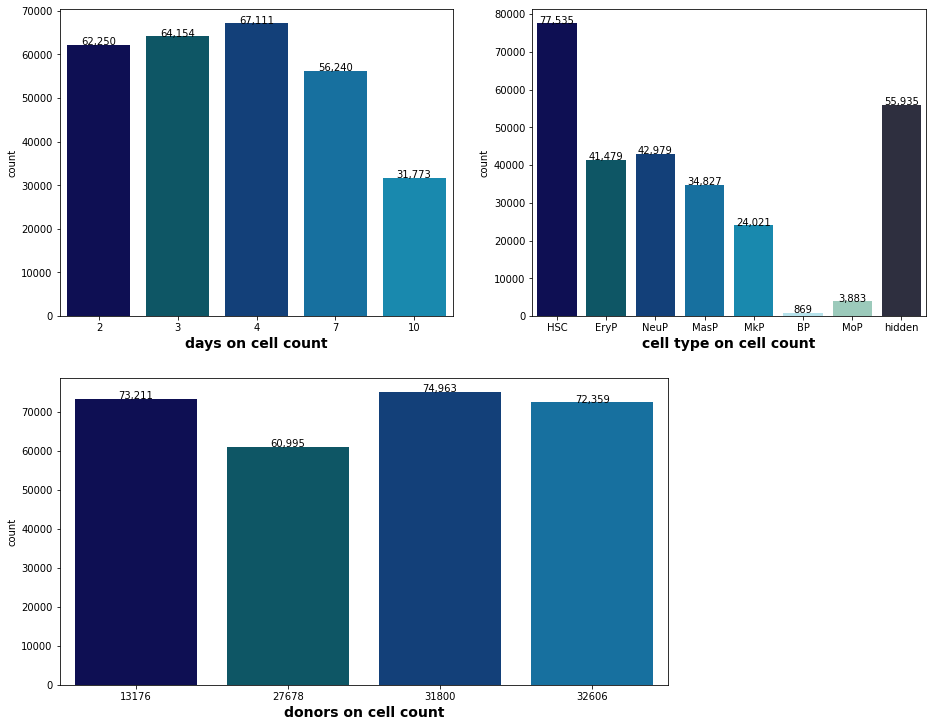

In [7]:
plt.figure(figsize=(24,26))
plt.subplot(4,3,1)
ax = sns.countplot(data=meta_data,x='day',palette=[using_colors[0],using_colors[1],using_colors[2],using_colors[3],using_colors[4]])
show_values_on_bars(ax,h_v='v',space=0.4)
ax.set_xlabel("days on cell count", size=14, weight='bold')

plt.subplot(4,3,2)
ax1 = sns.countplot(data=meta_data,x='cell_type',palette=[using_colors[0],using_colors[1],using_colors[2],using_colors[3],using_colors[4],using_colors[5],using_colors[6],using_colors[7]])
show_values_on_bars(ax1,h_v='v',space=0.4)
ax1.set_xlabel("cell type on cell count", size=14, weight='bold')

plt.subplot(4,2,3)
ax1 = sns.countplot(data=meta_data,x='donor',palette=[using_colors[0],using_colors[1],using_colors[2],using_colors[3]])
show_values_on_bars(ax1,h_v='v',space=0.4)
ax1.set_xlabel("donors on cell count", size=14, weight='bold')


### 🧬 Key Points:

* Most of the cells observed on Day 4 and Least on Day 10.
* Cell Type "HSC" observed the Most and Least is BP Cell Type.
* There is not much difference between donors, but we can say that donor with id: 27678's cell observed the most and 27678 least.

Text(3.0, 65000, 'Approx 65.0% of cells observed on Day 2,3,4')

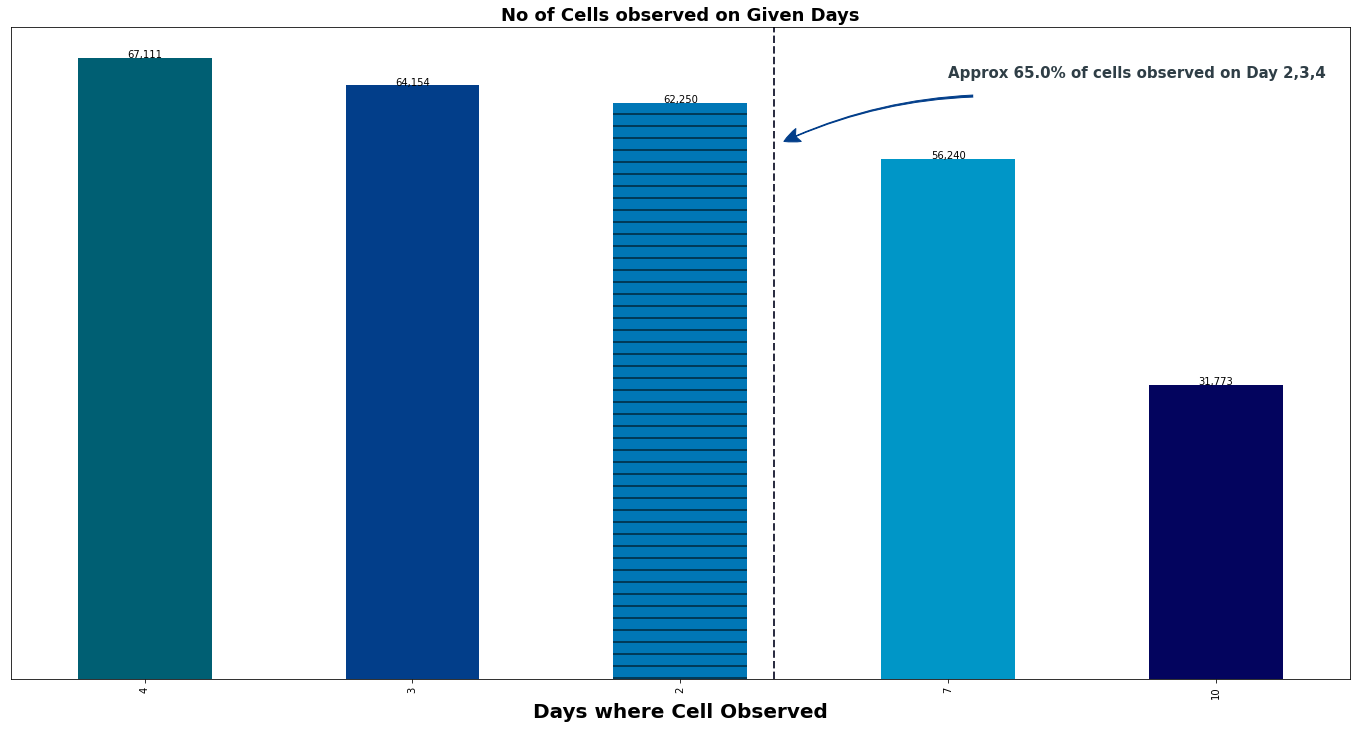

In [8]:
plt.figure(figsize=(24,12))
ax = meta_data.loc[:,'day'].value_counts().plot(kind='bar',color=[using_colors[1],using_colors[2],using_colors[3],using_colors[4],using_colors[0]])
show_values_on_bars(ax, h_v="v", space=0.4)
plt.title("No of Cells observed on Given Days",size=18,weight='bold')
plt.xlabel("Days where Cell Observed",size=20,weight='bold')
plt.ylabel("")
plt.yticks([])

for i, bar in enumerate(ax.patches):
    hatch = ''
    if i==2:
        hatch = '-'
    bar.set_hatch(hatch)
    

style = "Fancy, tail_width=2, head_width=14, head_length=16"
kw = dict(arrowstyle=style, color=using_colors[2])
arrow = patches.FancyArrowPatch((3.1,63000), (2.38, 58000),
                             connectionstyle="arc3,rad=.10", **kw)
plt.gca().add_patch(arrow)

plt.axvline(x=2.35, linestyle = '--', color=using_colors[7], lw=2)
plt.text(x=3.0, y=65000, s=f"Approx {round(65/100 * 100,2)}% of cells observed on Day 2,3,4",
         color='#2f3e46', size=15, weight="bold")

### 🧬 Key Points:

* Ok we see that, Day 2,3 and 4 have used for most observation of the cells.

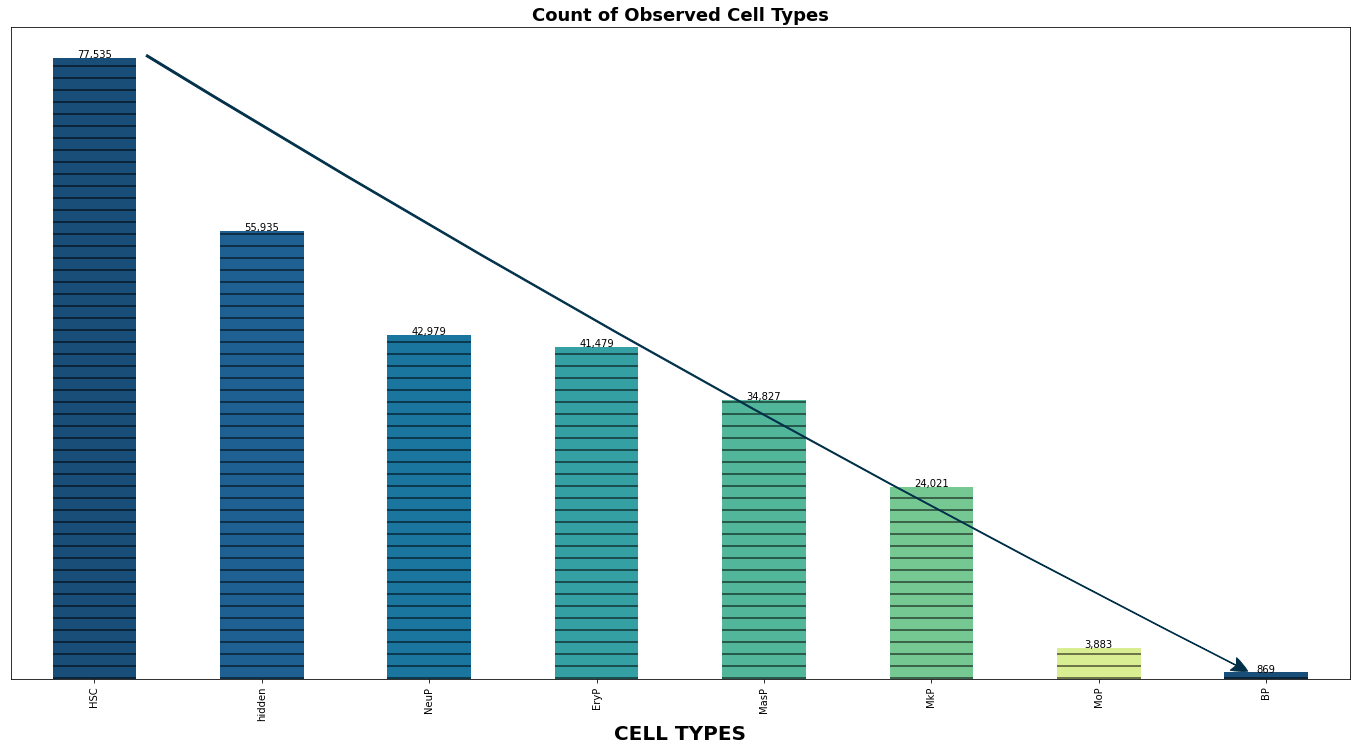

In [9]:
plt.figure(figsize=(24,12))
ax = meta_data.loc[:,'cell_type'].value_counts().plot(kind='bar',color=['#184e77','#1e6091','#1a759f','#34a0a4','#52b69a','#76c893','#d9ed92'])
show_values_on_bars(ax, h_v="v", space=0.4)
plt.title("Count of Observed Cell Types",size=18,weight='bold')
plt.xlabel("CELL TYPES",size=20,weight='bold')
plt.ylabel("")
plt.yticks([])

for i, bar in enumerate(ax.patches):
    hatch = '-'
    bar.set_hatch(hatch)
    
style = 'Fancy, tail_width=2,head_width=14,head_length=16'
kw = dict(arrowstyle=style,color='#003049')
arrow = patches.FancyArrowPatch((0.3,78000),(6.9,900),connectionstyle='arc3,rad=.02',**kw)
plt.gca().add_patch(arrow)

#### 🧬 **I N T E R P R E T A T I O N:**

* OK Now we can see that our competition is divided into two parts one is: Multiome and CITEseq.

* For Multiome Samples: we use Data of DNA and predict the RNA
* For CITEseq Samples: we use Data of RNA and predict the Protein.

* So for both Samples we design different models to predict them, 
  Like this DNA --> RNA --> Protein


[Discussed Here](https://www.kaggle.com/competitions/open-problems-multimodal/discussion/346888)


<a id="section-2.1"></a>

<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">EXPLORE EVALUATION CSV FILE</b>

In [10]:
eval_data = pd.read_csv(eval_data_path)
print_info(eval_data,'EVALUATION DATA')

=== EVALUATION DATA == 
There are 0 Missing Values 
Shape of data is : (65744180, 3)
Columns: Index(['row_id', 'cell_id', 'gene_id'], dtype='object') 


========== DATA =========




,row_id,cell_id,gene_id
0,0,c2150f55becb,CD86
1,1,c2150f55becb,CD274
2,2,c2150f55becb,CD270
3,3,c2150f55becb,CD155
4,4,c2150f55becb,CD112


#### **I N T E R P R E T A T I O N :** 🧬

* This is an evaluation csv file, on simple way we can say that this is a test.csv file, which is unseen data for the model.

* cell_id is repeating and according to our (data description), it says that (cell_id+gene_id) use to create unique Key. Means this Join key created the Unique key.

* It is explained in the Discussion by Ravi Shah, Here is the Link: [Link of Discussion](https://www.kaggle.com/competitions/open-problems-multimodal/discussion/346888)  

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F6537187%2F1997e2ec55923d44b4d0a53221311456%2Fsub_pic.PNG?generation=1661117789631290&alt=media)

<br>

<a id="section-3"></a>

<h1 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 1px; background-color: #ffffff; color: #03045e;" id="imports">&nbsp;&nbsp;EXPLORE CITEseq Data&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

In [11]:
citeseq_data = meta_data[meta_data['technology'] == 'citeseq']
print_info(citeseq_data,'CITEseq Data')

=== CITEseq Data == 
There are 0 Missing Values 
Shape of data is : (119651, 5)
Columns: Index(['cell_id', 'day', 'donor', 'cell_type', 'technology'], dtype='object') 


========== DATA =========




,cell_id,day,donor,cell_type,technology
0,c2150f55becb,2,27678,HSC,citeseq
1,65b7edf8a4da,2,27678,HSC,citeseq
2,c1b26cb1057b,2,27678,EryP,citeseq
3,917168fa6f83,2,27678,NeuP,citeseq
4,2b29feeca86d,2,27678,EryP,citeseq


#### **I N T E R P R E T A T I O N :** 🧬


* Ok the CITEseq DATASET contain 119651 samples.
* There is no Missing values in the CITEseq DATASET.
* All the Cell Types used in the CITEseq DATASET except on cell type which were hidden.
* There is no Duplicate Data in CITEseq DATASET


Text(4.1, 31000, 'Most Used Cell in the DNA --> RNA Conversion')

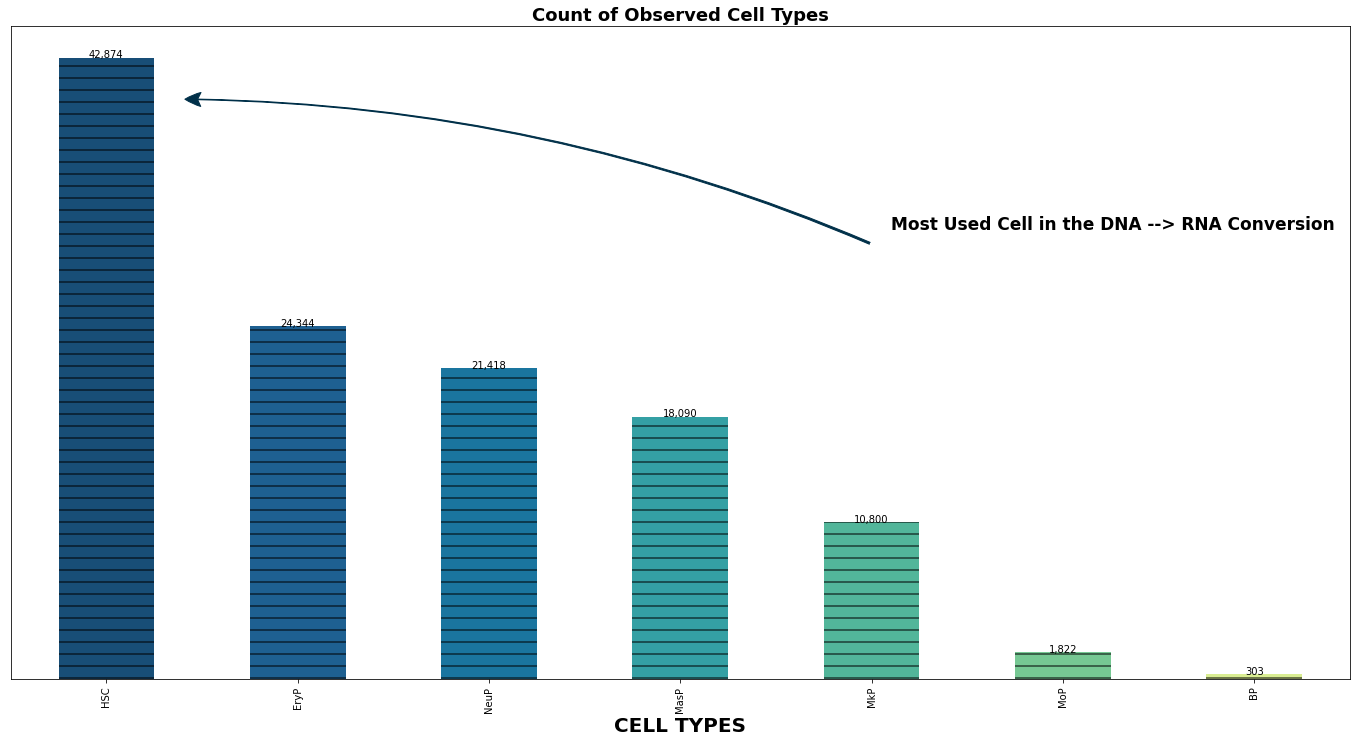

In [12]:
plt.figure(figsize=(24,12))
ax = citeseq_data.loc[:,'cell_type'].value_counts().plot(kind='bar',color=['#184e77','#1e6091','#1a759f','#34a0a4','#52b69a','#76c893','#d9ed92'])
show_values_on_bars(ax, h_v="v", space=0.4)
plt.title("Count of Observed Cell Types",size=18,weight='bold')
plt.xlabel("CELL TYPES",size=20,weight='bold')
plt.ylabel("")
plt.yticks([])

for i, bar in enumerate(ax.patches):
    hatch = '-'
    bar.set_hatch(hatch)
    
style = 'Fancy, tail_width=2,head_width=14,head_length=16'
kw = dict(arrowstyle=style,color='#003049')
arrow = patches.FancyArrowPatch((4,30000),(0.4,40000),connectionstyle='arc3,rad=.1',**kw)
plt.gca().add_patch(arrow)

plt.text(x=4.1,y=31000,s="Most Used Cell in the DNA --> RNA Conversion", size=17, weight='bold')

In [13]:
del meta_data
del citeseq_data
del eval_data
gc.collect()

2541

<br>

<a id="section-3.1"></a>

<h1 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 1px; background-color: #ffffff; color: #03045e;" id="imports">&nbsp;&nbsp;EXTRA INFORMATION&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>


#### **Now Explore HDF5 FILE IN CITEseq** 👀


<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">ABOUT HDF5 (.h5 file)</b>

<div class='highlight'>
<pre>
<span>HDF5 file stands for Hierarchical Data Format 5. It is an open-source file which comes in handy to store large amount of data. As the name suggests, it stores data in a hierarchical structure within a single file. So if we want to quickly access a particular part of the file rather than the whole file, we can easily do that using HDF5. This functionality is not seen in normal text files hence HDF5 is becoming seemingly popular in fact of being a new concept. To use HDF5, numpy needs to be imported. One important feature is that it can attach metaset to every data in the file thus provides powerful searching and accessing.</span>
</pre>
</div>


<b><mark>The Dataset works like numpy array.<b/><mark/>

* As we have <b><mark>train_cite_inputs.h5 file</b></mark> and we want to access it and use the information in it.
* We use h5py Library, to Import it into your kernel. Do the Following:
 
*    --> import h5py
*    --> store = h5py.File('Pathof .h5 file','r') , r is the read mode, which tells that it         is used for reading the data. 


In [14]:
import h5py
store = h5py.File(train_cite_path,'r')

* The File object is your starting point. What is stored in this file? Remember h5py.File acts like a Python dictionary, thus we can check the keys,

In [15]:
print(clr.S+f" FILE IS : {store.keys()}"+clr.E)

 FILE IS : <KeysViewHDF5 ['train_cite_inputs']>


* This is the File which is stored in the .h5 type file.
* When we read the data it is not in numpy array, so to check the data we first convert it into numpy array then we can check it's data.

In [16]:
data = store.get('train_cite_inputs')
dataset = np.array(data)
print(dataset.shape)
k = list(data.attrs.keys())
v = list(data.attrs.values())
print(k)
print(v)

del data
del dataset
del k,v
gc.collect()

(4,)
['CLASS', 'TITLE', 'VERSION', 'axis0_variety', 'axis1_variety', 'block0_items_variety', 'encoding', 'errors', 'nblocks', 'ndim', 'pandas_type', 'pandas_version']
[b'GROUP', Empty(dtype=dtype('S1')), b'1.0', b'regular', b'regular', b'regular', b'UTF-8', b'strict', 1, 2, b'frame', b'0.15.2']


46

<br>

<a id="section-4"></a>

<h1 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 1px; background-color: #ffffff; color: #03045e;" id="imports">&nbsp;&nbsp;EXPLORATION IN CITEseq Train Data &nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>


* It just print out the info of the hdf file.
* we don't find it much useful so we use pandas function read_hdf to read the data and show the proper data to the users.

In [17]:
train_hdf_cite = pd.read_hdf(train_cite_path)
print_info(train_hdf_cite,'Train HDF Input Data')

=== Train HDF Input Data == 
There are 0 Missing Values 
Shape of data is : (70988, 22050)
Columns: Index(['ENSG00000121410_A1BG', 'ENSG00000268895_A1BG-AS1',
       'ENSG00000175899_A2M', 'ENSG00000245105_A2M-AS1',
       'ENSG00000166535_A2ML1', 'ENSG00000128274_A4GALT',
       'ENSG00000094914_AAAS', 'ENSG00000081760_AACS', 'ENSG00000109576_AADAT',
       'ENSG00000103591_AAGAB',
       ...
       'ENSG00000153975_ZUP1', 'ENSG00000086827_ZW10',
       'ENSG00000174442_ZWILCH', 'ENSG00000122952_ZWINT',
       'ENSG00000198205_ZXDA', 'ENSG00000198455_ZXDB', 'ENSG00000070476_ZXDC',
       'ENSG00000162378_ZYG11B', 'ENSG00000159840_ZYX',
       'ENSG00000074755_ZZEF1'],
      dtype='object', name='gene_id', length=22050) 


========== DATA =========




gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,4.090185,0.0
d02759a80ba2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.00000,0.000000,0.000000,0.0
c016c6b0efa5,0.0,0.0,0.0,0.0,0.0,3.847321,0.000000,3.847321,3.847321,0.0,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.00000,3.847321,3.847321,0.0
ba7f733a4f75,0.0,0.0,0.0,0.0,0.0,0.000000,3.436846,3.436846,0.000000,0.0,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.00000,3.436846,4.113780,0.0
fbcf2443ffb2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.196826,0.000000,0.0,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.51861,4.196826,3.518610,0.0


#### **I N T E R P R E T A T I O N :** 🧬

* The dataset is too big, which can crash the RAM, because if we clearly look into the data of only CITEseq technology and only training data. it contains 22050 features 70988 instances. It is too big
* The data is type float32 which says that it has 32 bits and 4 bytes, because 1 byte = 8 bits. so approx it's size is in GBS.
* As you take a clear look on the dataset, most of the data in the table have zero and ~78% of the data have zeros.
* we can drop those data which are fully zero and most of them zero, because this kind of data create a sparse matrix.
* **SPARSE MATRIX:** So a matrix will be a sparse matrix if most of the elements of it is 0. Another definition is, a matrix with a maximum of 1/3 non-zero elements (roughly 30% of m x n) is known as sparse matrix.
* AMBROSM Explored every bit of it and explained it very well. Here is the Kernel: [Click here](https://www.kaggle.com/code/ambrosm/msci-eda-which-makes-sense) 
* As this .h5 data file is too big and unfortunatily the problem of ran out of RAM will be introduced.

In [18]:
# Pavan Sanagapati Explained different types of the memory efficiency.
# Check it out, if you want to learn more about it: https://www.kaggle.com/code/pavansanagapati/14-simple-tips-to-save-ram-memory-for-1-gb-dataset/notebook
train_hdf_cite.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 70988 entries, 45006fe3e4c8 to c91b6b2ccd3d
Columns: 22050 entries, ENSG00000121410_A1BG to ENSG00000074755_ZZEF1
dtypes: float32(22050)
memory usage: 5.8 GB


#### **INTERPRETATION OF MEMOMRY USAGE** 💽

We can use the info() method to fetch high level information about our dataframe, including its size, information about data types and memory usage.

By default, pandas approximates of the memory usage of the dataframe to save time. Because we’re interested in accuracy, we’ll set the memory_usage parameter to 'deep' to get an accurate number.

<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">Free Mamory using gc.collect Function</b> 🔧 

In python notebook once a dataset loads into RAM it does not free on its own.So if you load a huge dataframe like above into pandas, and then make a copy of it and never use it again, that original dataframe will still be in RAM consuming memory which is same as other variables.Therefore we should adopt the habit of deleting dataframe when it is no longer in use to save memory.



For example, suppose we using a dataframe by name train_hdf_data/meta_data, extract/explore some features and got the insights of the data but later on never used it ,then train_hdf_data/meta_data will be consuming space.So we need to explicitely delete it using 'del' command.Note that there is no variable dependency on this dataframe before deleting it. So even after doing so there may be some residual memory usage.

That's where the garbage collection module comes into effect. import gc at the beginning of your project, and then each time you want to clear up space put command gc.collect() .

It also helps to run gc.collect() after multiple transformations/functions/copying etc... as all the little references/values accumulate.

Now we loaded the dataframe it is evident that it is consuming memory.Now let us delete the dataframe and collect residual garbage using gc.collect() method

<br>

<a id="imports"></a>

<h1 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 1px; background-color: #ffffff; color: #03045e;" id="imports">&nbsp;&nbsp;Code of Using gc.collect():&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

    del meta_data
    gc.collect()
    

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


([], [])

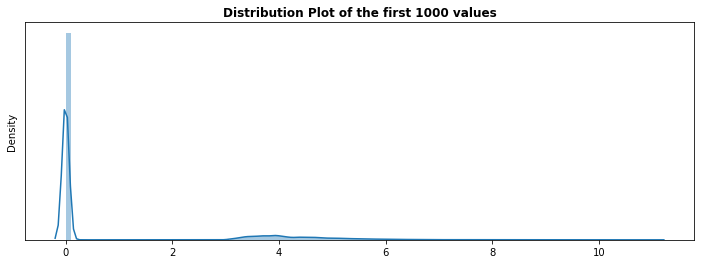

In [19]:
plt.figure(figsize=(12,4))
sns.distplot(train_hdf_cite[:1000],bins=100)
plt.title("Distribution Plot of the first 1000 values", size=12,weight='bold')
plt.yticks([])

#### **I N T E R P R E T A T I O N :** 🧬

* OK Now we see that on visualization, most of the values are on 0 so we confirm that most of the values are zero 

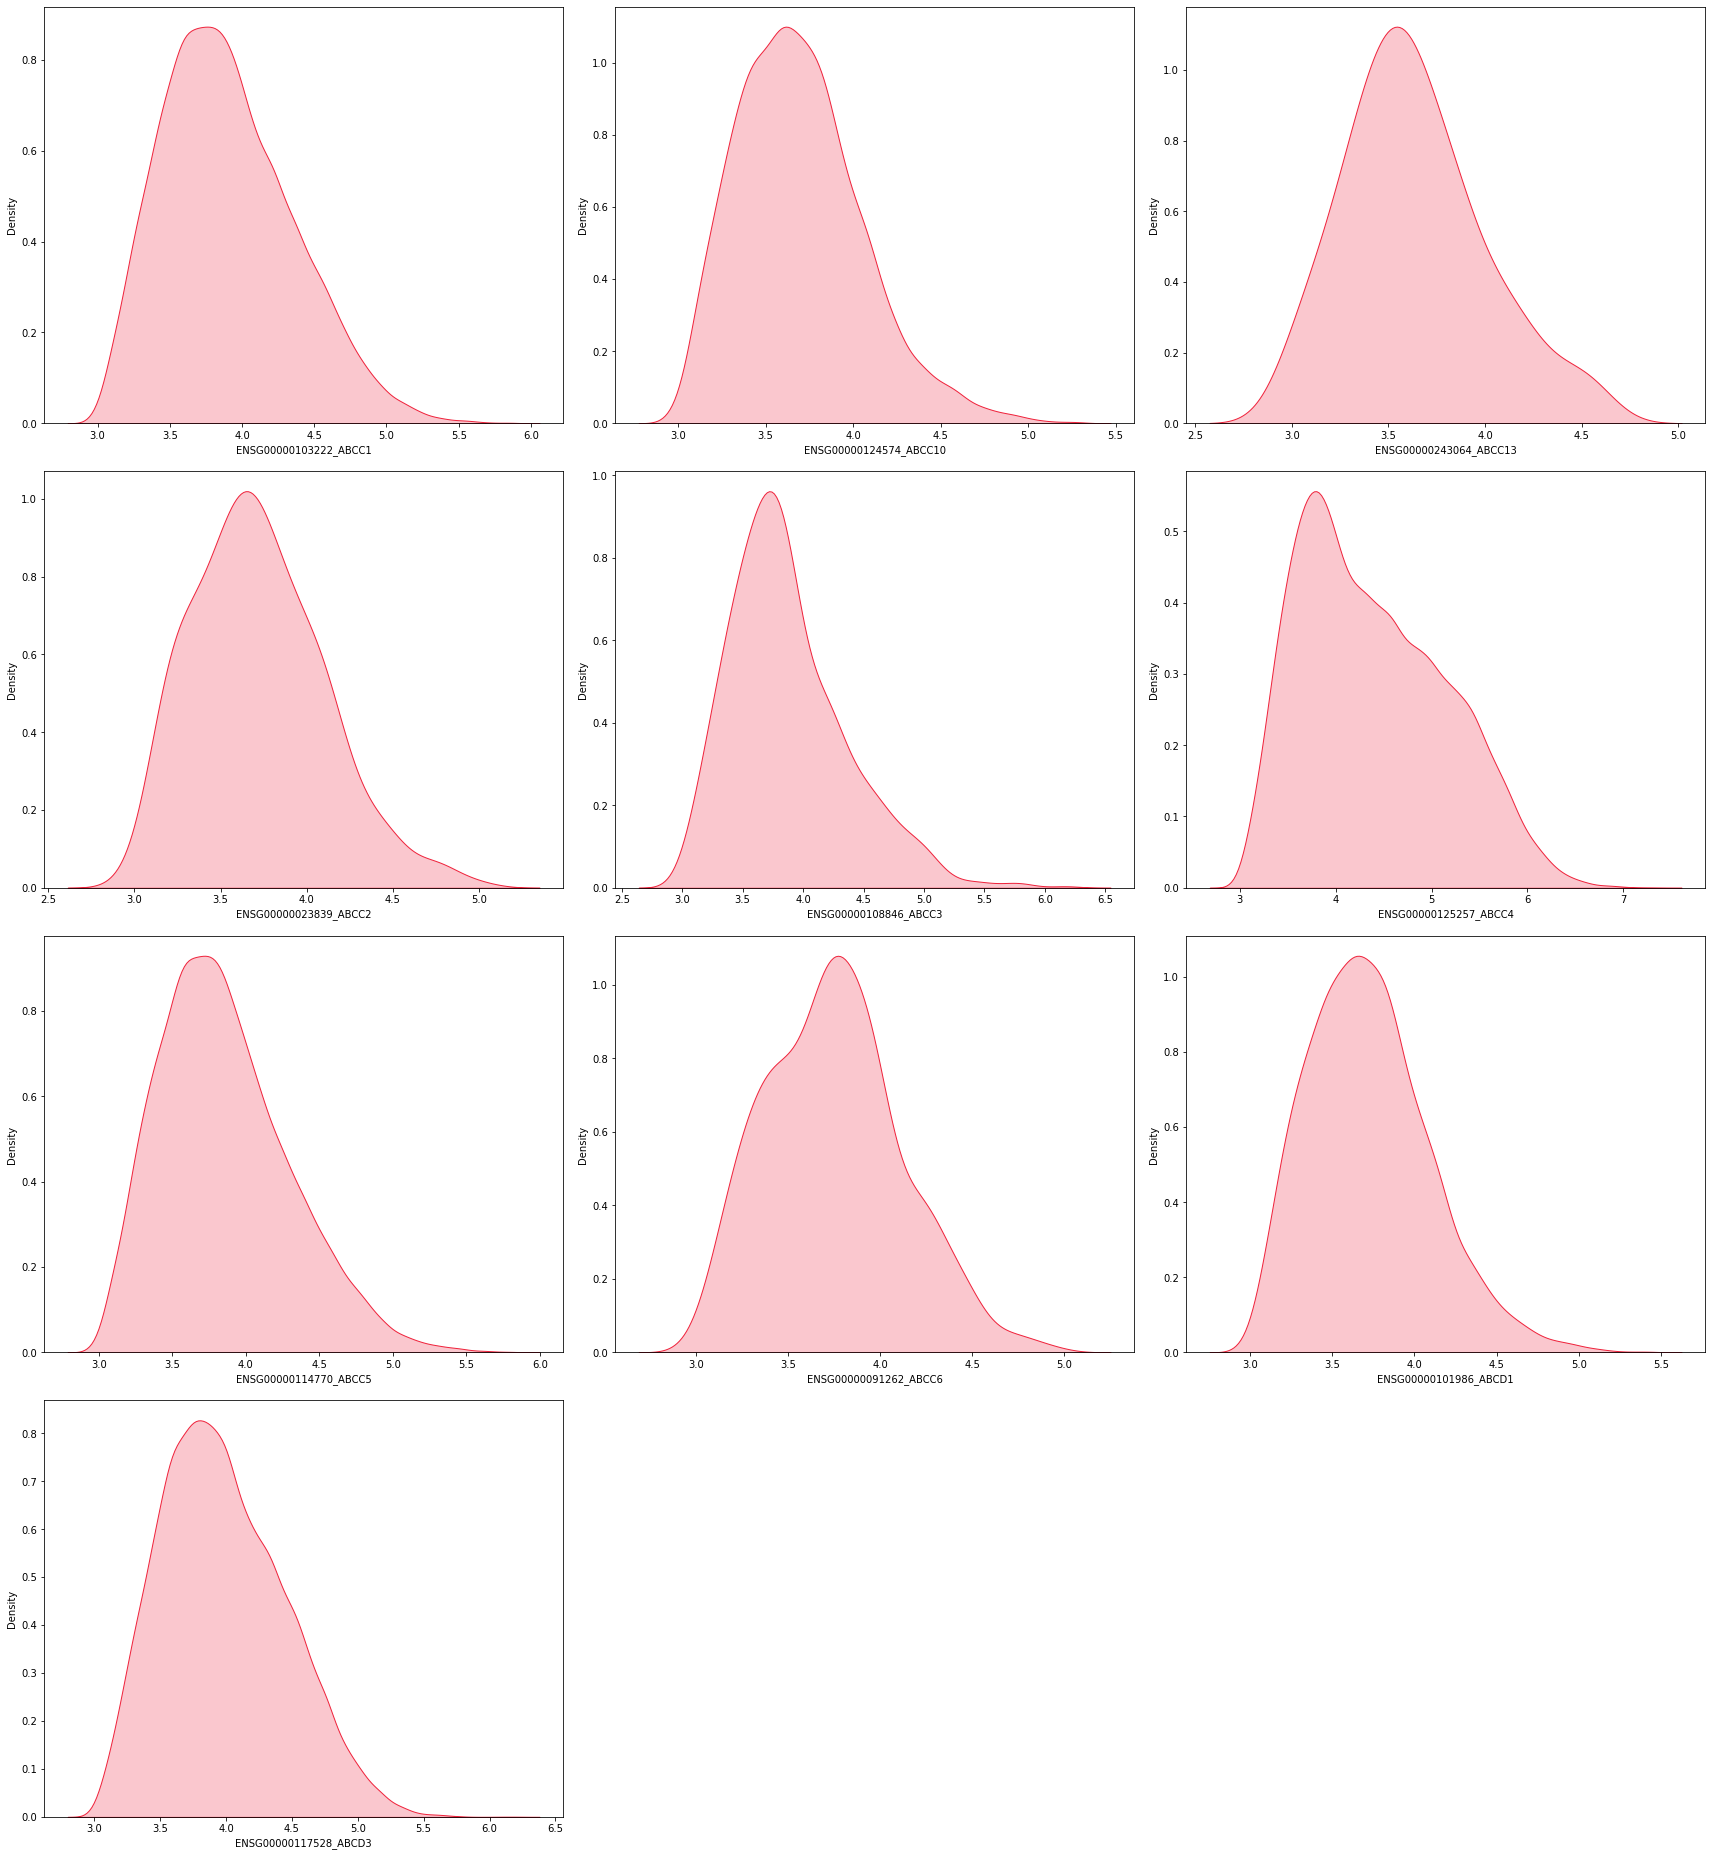

11178

In [20]:
i = 0 
fig = plt.figure(figsize=(24,26))
for col in train_hdf_cite.columns[45:55]:
    plt.subplot(4,3,i+1)
    dt = train_hdf_cite[col]
    dt = dt[dt != 0]
    sns.kdeplot(dt,shade=True,color='#ef233c')
    i = i + 1
fig.tight_layout(pad=1.5)
plt.show()
del dt,i
gc.collect()

Ok Now we can see that most of the data in every feature are zero.

In [21]:
train_cite_columns = train_hdf_cite.columns

In [22]:
del train_hdf_cite
gc.collect()

46

<br>

<a id="section-4.1"></a>

<h1 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 1px; background-color: #ffffff; color: #03045e;" id="imports">&nbsp;&nbsp;Explore Target Data of CITEseq&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

In [23]:
train_hdf_cite_target = pd.read_hdf(train_cite_target_path)
print_info(train_hdf_cite_target,'Train HDF Target Data')

=== Train HDF Target Data == 
There are 0 Missing Values 
Shape of data is : (70988, 140)
Columns: Index(['CD86', 'CD274', 'CD270', 'CD155', 'CD112', 'CD47', 'CD48', 'CD40',
       'CD154', 'CD52',
       ...
       'CD94', 'CD162', 'CD85j', 'CD23', 'CD328', 'HLA-E', 'CD82', 'CD101',
       'CD88', 'CD224'],
      dtype='object', name='gene_id', length=140) 


========== DATA =========




gene_id,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD94,CD162,CD85j,CD23,CD328,HLA-E,CD82,CD101,CD88,CD224
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,1.167804,0.622530,0.106959,0.324989,3.331674,6.426002,1.480766,-0.728392,-0.468851,-0.073285,...,-0.448390,3.220174,-0.533004,0.674956,-0.006187,0.682148,1.398105,0.414292,1.780314,0.548070
d02759a80ba2,0.818970,0.506009,1.078682,6.848758,3.524885,5.279456,4.930438,2.069372,0.333652,-0.468088,...,0.323613,8.407108,0.131301,0.047607,-0.243628,0.547864,1.832587,0.982308,2.736507,2.184063
c016c6b0efa5,-0.356703,-0.422261,-0.824493,1.137495,0.518924,7.221962,-0.375034,1.738071,0.142919,-0.971460,...,1.348692,4.888579,-0.279483,-0.131097,-0.177604,-0.689188,9.013709,-1.182975,3.958148,2.868600
ba7f733a4f75,-1.201507,0.149115,2.022468,6.021595,7.258670,2.792436,21.708519,-0.137913,1.649969,-0.754680,...,1.504426,12.391979,0.511394,0.587863,-0.752638,1.714851,3.893782,1.799661,1.537249,4.407671
fbcf2443ffb2,-0.100404,0.697461,0.625836,-0.298404,1.369898,3.254521,-1.659380,0.643531,0.902710,1.291877,...,0.777023,6.496499,0.279898,-0.841950,-0.869419,0.675092,5.259685,-0.835379,9.631781,1.765445


#### **I N T E R P R E T A T I O N :** 🧬

* Ok Now we see that these CITEseq data have relationship between them, because CITEseq data is about the relationship between Gene --> Protein.
* If you look at the Train HDF Input file, then it's values are not showing much meaningful things because most of the data are zero, but if we look at the column names Like: 'ENSG00000121410_A1BG', 'ENSG00000268895_A1BG-AS1', upto so on. these can be called as Gene.
* On the other Side, If you take a careful look into the Columns of Train HDF Target File, then we can again say that it's values are not showing much meaningful things because most of the data are zero, but if we look at the column names Like: 'CD86', 'CD274', 'CD270', upto so on can be known as Protein.

This Thing is Discussed Here in the Discussion: [Exploiting the column names](https://www.kaggle.com/competitions/open-problems-multimodal/discussion/349242)

**Insight:** This is an insight from the discussion and the data, that we can reduce these 22050 features by applying Dimensionality Reduction (PCA,FA,SVD) to reduce the dimensions to 151.

* This will reduce the Size of the DataSet with Same amount of Information.

<br>

<a id="section-4.2"></a>

<h1 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 1px; background-color: #ffffff; color: #03045e;" id="imports">&nbsp;&nbsp;Explore Relationship of Gene and Protein&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

* As I explained Above about the relationship between the train CITEseq hdf file and train CITEseq hdf target file. 

In [24]:
train_cite_target_columns = train_hdf_cite_target.columns
train_cite_target_columns
df = pd.DataFrame()
i = 0 
for (gene,prot) in zip(train_cite_columns,train_cite_target_columns):
    df.at[i,'Gene'] = gene
    df.at[i,'Protein'] = prot
    i = i + 1

#### **I N T E R P R E T A T I O N :** 🧬

* We can clearly see that in our new dataframe, we have every input Gene and it's output in form of Protein.

In [25]:
display(df.head())

,Gene,Protein
0,ENSG00000121410_A1BG,CD86
1,ENSG00000268895_A1BG-AS1,CD274
2,ENSG00000175899_A2M,CD270
3,ENSG00000245105_A2M-AS1,CD155
4,ENSG00000166535_A2ML1,CD112


#### **LET'S EXPLORE THE SIZE OF CITEseq DATA IN TOTAL:**

In [26]:
constant_cols = ['ENSG00000003137_CYP26B1', 'ENSG00000004848_ARX', 'ENSG00000006606_CCL26', 'ENSG00000010379_SLC6A13', 'ENSG00000010932_FMO1', 'ENSG00000017427_IGF1', 'ENSG00000022355_GABRA1', 'ENSG00000041982_TNC', 'ENSG00000060709_RIMBP2', 'ENSG00000064886_CHI3L2', 'ENSG00000065717_TLE2', 'ENSG00000067798_NAV3', 'ENSG00000069535_MAOB', 'ENSG00000073598_FNDC8', 'ENSG00000074219_TEAD2', 'ENSG00000074964_ARHGEF10L', 'ENSG00000077264_PAK3', 'ENSG00000078053_AMPH', 'ENSG00000082684_SEMA5B', 'ENSG00000083857_FAT1', 'ENSG00000084628_NKAIN1', 'ENSG00000084734_GCKR', 'ENSG00000086967_MYBPC2', 'ENSG00000087258_GNAO1', 'ENSG00000089505_CMTM1', 'ENSG00000091129_NRCAM', 'ENSG00000091986_CCDC80', 'ENSG00000092377_TBL1Y', 'ENSG00000092969_TGFB2', 'ENSG00000095397_WHRN', 'ENSG00000095970_TREM2', 'ENSG00000099715_PCDH11Y', 'ENSG00000100197_CYP2D6', 'ENSG00000100218_RSPH14', 'ENSG00000100311_PDGFB', 'ENSG00000100362_PVALB', 'ENSG00000100373_UPK3A', 'ENSG00000100625_SIX4', 'ENSG00000100867_DHRS2', 'ENSG00000100985_MMP9', 'ENSG00000101197_BIRC7', 'ENSG00000101298_SNPH', 'ENSG00000102387_TAF7L', 'ENSG00000103034_NDRG4', 'ENSG00000104059_FAM189A1', 'ENSG00000104112_SCG3', 'ENSG00000104313_EYA1', 'ENSG00000104892_KLC3', 'ENSG00000105088_OLFM2', 'ENSG00000105261_OVOL3', 'ENSG00000105290_APLP1', 'ENSG00000105507_CABP5', 'ENSG00000105642_KCNN1', 'ENSG00000105694_ELOCP28', 'ENSG00000105707_HPN', 'ENSG00000105894_PTN', 'ENSG00000106018_VIPR2', 'ENSG00000106541_AGR2', 'ENSG00000107317_PTGDS', 'ENSG00000108688_CCL7', 'ENSG00000108702_CCL1', 'ENSG00000108947_EFNB3', 'ENSG00000109193_SULT1E1', 'ENSG00000109794_FAM149A', 'ENSG00000109832_DDX25', 'ENSG00000110195_FOLR1', 'ENSG00000110375_UPK2', 'ENSG00000110436_SLC1A2', 'ENSG00000111339_ART4', 'ENSG00000111863_ADTRP', 'ENSG00000112761_WISP3', 'ENSG00000112852_PCDHB2', 'ENSG00000114251_WNT5A', 'ENSG00000114279_FGF12', 'ENSG00000114455_HHLA2', 'ENSG00000114757_PEX5L', 'ENSG00000115155_OTOF', 'ENSG00000115266_APC2', 'ENSG00000115297_TLX2', 'ENSG00000115590_IL1R2', 'ENSG00000115844_DLX2', 'ENSG00000116194_ANGPTL1', 'ENSG00000116661_FBXO2', 'ENSG00000116774_OLFML3', 'ENSG00000117322_CR2', 'ENSG00000117971_CHRNB4', 'ENSG00000118322_ATP10B', 'ENSG00000118402_ELOVL4', 'ENSG00000118520_ARG1', 'ENSG00000118946_PCDH17', 'ENSG00000118972_FGF23', 'ENSG00000119771_KLHL29', 'ENSG00000120549_KIAA1217', 'ENSG00000121316_PLBD1', 'ENSG00000121905_HPCA', 'ENSG00000122224_LY9', 'ENSG00000124194_GDAP1L1', 'ENSG00000124440_HIF3A', 'ENSG00000124657_OR2B6', 'ENSG00000125462_C1orf61', 'ENSG00000125895_TMEM74B', 'ENSG00000126838_PZP', 'ENSG00000128422_KRT17', 'ENSG00000128918_ALDH1A2', 'ENSG00000129170_CSRP3', 'ENSG00000129214_SHBG', 'ENSG00000129673_AANAT', 'ENSG00000129910_CDH15', 'ENSG00000130294_KIF1A', 'ENSG00000130307_USHBP1', 'ENSG00000130545_CRB3', 'ENSG00000131019_ULBP3', 'ENSG00000131044_TTLL9', 'ENSG00000131183_SLC34A1', 'ENSG00000131386_GALNT15', 'ENSG00000131400_NAPSA', 'ENSG00000131914_LIN28A', 'ENSG00000131941_RHPN2', 'ENSG00000131951_LRRC9', 'ENSG00000132170_PPARG', 'ENSG00000132681_ATP1A4', 'ENSG00000132958_TPTE2', 'ENSG00000133454_MYO18B', 'ENSG00000134545_KLRC1', 'ENSG00000134853_PDGFRA', 'ENSG00000135083_CCNJL', 'ENSG00000135100_HNF1A', 'ENSG00000135116_HRK', 'ENSG00000135312_HTR1B', 'ENSG00000135324_MRAP2', 'ENSG00000135436_FAM186B', 'ENSG00000135472_FAIM2', 'ENSG00000135898_GPR55', 'ENSG00000135929_CYP27A1', 'ENSG00000136002_ARHGEF4', 'ENSG00000136099_PCDH8', 'ENSG00000136274_NACAD', 'ENSG00000137078_SIT1', 'ENSG00000137142_IGFBPL1', 'ENSG00000137473_TTC29', 'ENSG00000137474_MYO7A', 'ENSG00000137491_SLCO2B1', 'ENSG00000137691_CFAP300', 'ENSG00000137731_FXYD2', 'ENSG00000137747_TMPRSS13', 'ENSG00000137878_GCOM1', 'ENSG00000138411_HECW2', 'ENSG00000138741_TRPC3', 'ENSG00000138769_CDKL2', 'ENSG00000138823_MTTP', 'ENSG00000139908_TSSK4', 'ENSG00000140832_MARVELD3', 'ENSG00000142178_SIK1', 'ENSG00000142538_PTH2', 'ENSG00000142910_TINAGL1', 'ENSG00000143217_NECTIN4', 'ENSG00000143858_SYT2', 'ENSG00000144130_NT5DC4', 'ENSG00000144214_LYG1', 'ENSG00000144290_SLC4A10', 'ENSG00000144366_GULP1', 'ENSG00000144583_MARCH4', 'ENSG00000144771_LRTM1', 'ENSG00000144891_AGTR1', 'ENSG00000145087_STXBP5L', 'ENSG00000145107_TM4SF19', 'ENSG00000146197_SCUBE3', 'ENSG00000146966_DENND2A', 'ENSG00000147082_CCNB3', 'ENSG00000147614_ATP6V0D2', 'ENSG00000147642_SYBU', 'ENSG00000147869_CER1', 'ENSG00000149403_GRIK4', 'ENSG00000149596_JPH2', 'ENSG00000150630_VEGFC', 'ENSG00000150722_PPP1R1C', 'ENSG00000151631_AKR1C6P', 'ENSG00000151704_KCNJ1', 'ENSG00000152154_TMEM178A', 'ENSG00000152292_SH2D6', 'ENSG00000152315_KCNK13', 'ENSG00000152503_TRIM36', 'ENSG00000153253_SCN3A', 'ENSG00000153902_LGI4', 'ENSG00000153930_ANKFN1', 'ENSG00000154040_CABYR', 'ENSG00000154118_JPH3', 'ENSG00000154175_ABI3BP', 'ENSG00000154645_CHODL', 'ENSG00000157060_SHCBP1L', 'ENSG00000157087_ATP2B2', 'ENSG00000157152_SYN2', 'ENSG00000157168_NRG1', 'ENSG00000157680_DGKI', 'ENSG00000158246_TENT5B', 'ENSG00000158477_CD1A', 'ENSG00000158481_CD1C', 'ENSG00000158488_CD1E', 'ENSG00000159189_C1QC', 'ENSG00000159217_IGF2BP1', 'ENSG00000160683_CXCR5', 'ENSG00000160801_PTH1R', 'ENSG00000160973_FOXH1', 'ENSG00000161594_KLHL10', 'ENSG00000162409_PRKAA2', 'ENSG00000162840_MT2P1', 'ENSG00000162873_KLHDC8A', 'ENSG00000162944_RFTN2', 'ENSG00000162949_CAPN13', 'ENSG00000163116_STPG2', 'ENSG00000163288_GABRB1', 'ENSG00000163531_NFASC', 'ENSG00000163618_CADPS', 'ENSG00000163637_PRICKLE2', 'ENSG00000163735_CXCL5', 'ENSG00000163873_GRIK3', 'ENSG00000163898_LIPH', 'ENSG00000164061_BSN', 'ENSG00000164078_MST1R', 'ENSG00000164123_C4orf45', 'ENSG00000164690_SHH', 'ENSG00000164761_TNFRSF11B', 'ENSG00000164821_DEFA4', 'ENSG00000164845_FAM86FP', 'ENSG00000164867_NOS3', 'ENSG00000166073_GPR176', 'ENSG00000166148_AVPR1A', 'ENSG00000166250_CLMP', 'ENSG00000166257_SCN3B', 'ENSG00000166268_MYRFL', 'ENSG00000166523_CLEC4E', 'ENSG00000166535_A2ML1', 'ENSG00000166819_PLIN1', 'ENSG00000166928_MS4A14', 'ENSG00000167210_LOXHD1', 'ENSG00000167306_MYO5B', 'ENSG00000167634_NLRP7', 'ENSG00000167748_KLK1', 'ENSG00000167889_MGAT5B', 'ENSG00000168140_VASN', 'ENSG00000168546_GFRA2', 'ENSG00000168646_AXIN2', 'ENSG00000168955_TM4SF20', 'ENSG00000168993_CPLX1', 'ENSG00000169075_Z99496.1', 'ENSG00000169194_IL13', 'ENSG00000169246_NPIPB3', 'ENSG00000169884_WNT10B', 'ENSG00000169900_PYDC1', 'ENSG00000170074_FAM153A', 'ENSG00000170075_GPR37L1', 'ENSG00000170289_CNGB3', 'ENSG00000170356_OR2A20P', 'ENSG00000170537_TMC7', 'ENSG00000170689_HOXB9', 'ENSG00000170827_CELP', 'ENSG00000171346_KRT15', 'ENSG00000171368_TPPP', 'ENSG00000171501_OR1N2', 'ENSG00000171532_NEUROD2', 'ENSG00000171611_PTCRA', 'ENSG00000171873_ADRA1D', 'ENSG00000171916_LGALS9C', 'ENSG00000172005_MAL', 'ENSG00000172987_HPSE2', 'ENSG00000173068_BNC2', 'ENSG00000173077_DEC1', 'ENSG00000173210_ABLIM3', 'ENSG00000173267_SNCG', 'ENSG00000173369_C1QB', 'ENSG00000173372_C1QA', 'ENSG00000173391_OLR1', 'ENSG00000173626_TRAPPC3L', 'ENSG00000173698_ADGRG2', 'ENSG00000173868_PHOSPHO1', 'ENSG00000174407_MIR1-1HG', 'ENSG00000174807_CD248', 'ENSG00000175206_NPPA', 'ENSG00000175746_C15orf54', 'ENSG00000175985_PLEKHD1', 'ENSG00000176043_AC007160.1', 'ENSG00000176399_DMRTA1', 'ENSG00000176510_OR10AC1', 'ENSG00000176697_BDNF', 'ENSG00000176826_FKBP9P1', 'ENSG00000176988_FMR1NB', 'ENSG00000177324_BEND2', 'ENSG00000177335_C8orf31', 'ENSG00000177535_OR2B11', 'ENSG00000177614_PGBD5', 'ENSG00000177707_NECTIN3', 'ENSG00000178033_CALHM5', 'ENSG00000178175_ZNF366', 'ENSG00000178462_TUBAL3', 'ENSG00000178732_GP5', 'ENSG00000178750_STX19', 'ENSG00000179058_C9orf50', 'ENSG00000179101_AL590139.1', 'ENSG00000179388_EGR3', 'ENSG00000179611_DGKZP1', 'ENSG00000179899_PHC1P1', 'ENSG00000179934_CCR8', 'ENSG00000180537_RNF182', 'ENSG00000180712_LINC02363', 'ENSG00000180988_OR52N2', 'ENSG00000181001_OR52N1', 'ENSG00000181616_OR52H1', 'ENSG00000181634_TNFSF15', 'ENSG00000182021_AL591379.1', 'ENSG00000182230_FAM153B', 'ENSG00000182853_VMO1', 'ENSG00000183090_FREM3', 'ENSG00000183562_AC131971.1', 'ENSG00000183615_FAM167B', 'ENSG00000183625_CCR3', 'ENSG00000183770_FOXL2', 'ENSG00000183779_ZNF703', 'ENSG00000183831_ANKRD45', 'ENSG00000183844_FAM3B', 'ENSG00000183960_KCNH8', 'ENSG00000184106_TREML3P', 'ENSG00000184227_ACOT1', 'ENSG00000184363_PKP3', 'ENSG00000184434_LRRC19', 'ENSG00000184454_NCMAP', 'ENSG00000184571_PIWIL3', 'ENSG00000184702_SEPT5', 'ENSG00000184908_CLCNKB', 'ENSG00000184923_NUTM2A', 'ENSG00000185070_FLRT2', 'ENSG00000185156_MFSD6L', 'ENSG00000185567_AHNAK2', 'ENSG00000185686_PRAME', 'ENSG00000186190_BPIFB3', 'ENSG00000186191_BPIFB4', 'ENSG00000186231_KLHL32', 'ENSG00000186431_FCAR', 'ENSG00000186715_MST1L', 'ENSG00000187116_LILRA5', 'ENSG00000187185_AC092118.1', 'ENSG00000187268_FAM9C', 'ENSG00000187554_TLR5', 'ENSG00000187867_PALM3', 'ENSG00000188153_COL4A5', 'ENSG00000188158_NHS', 'ENSG00000188163_FAM166A', 'ENSG00000188316_ENO4', 'ENSG00000188959_C9orf152', 'ENSG00000189013_KIR2DL4', 'ENSG00000189409_MMP23B', 'ENSG00000196092_PAX5', 'ENSG00000196260_SFTA2', 'ENSG00000197358_BNIP3P1', 'ENSG00000197446_CYP2F1', 'ENSG00000197540_GZMM', 'ENSG00000198049_AVPR1B', 'ENSG00000198134_AC007537.1', 'ENSG00000198156_NPIPB6', 'ENSG00000198221_AFDN-DT', 'ENSG00000198626_RYR2', 'ENSG00000198759_EGFL6', 'ENSG00000198822_GRM3', 'ENSG00000198963_RORB', 'ENSG00000199090_MIR326', 'ENSG00000199753_SNORD104', 'ENSG00000199787_RF00406', 'ENSG00000199872_RNU6-942P', 'ENSG00000200075_RF00402', 'ENSG00000200296_RNU1-83P', 'ENSG00000200683_RNU6-379P', 'ENSG00000201044_RNU6-268P', 'ENSG00000201343_RF00019', 'ENSG00000201564_RN7SKP50', 'ENSG00000201616_RNU1-91P', 'ENSG00000201737_RNU1-133P', 'ENSG00000202048_SNORD114-20', 'ENSG00000202415_RN7SKP269', 'ENSG00000203395_AC015969.1', 'ENSG00000203721_LINC00862', 'ENSG00000203727_SAMD5', 'ENSG00000203737_GPR52', 'ENSG00000203783_PRR9', 'ENSG00000203867_RBM20', 'ENSG00000203907_OOEP', 'ENSG00000203999_LINC01270', 'ENSG00000204010_IFIT1B', 'ENSG00000204044_SLC12A5-AS1', 'ENSG00000204091_TDRG1', 'ENSG00000204121_ECEL1P1', 'ENSG00000204165_CXorf65', 'ENSG00000204173_LRRC37A5P', 
                 'ENSG00000204248_COL11A2', 'ENSG00000204424_LY6G6F', 'ENSG00000204539_CDSN', 'ENSG00000204583_LRCOL1', 'ENSG00000204677_FAM153C', 'ENSG00000204709_LINC01556', 'ENSG00000204711_C9orf135', 'ENSG00000204792_LINC01291', 'ENSG00000204850_AC011484.1', 'ENSG00000204851_PNMA8B', 'ENSG00000204909_SPINK9', 'ENSG00000205037_AC134312.1', 'ENSG00000205038_PKHD1L1', 'ENSG00000205089_CCNI2', 'ENSG00000205106_DKFZp779M0652', 'ENSG00000205364_MT1M', 'ENSG00000205502_C2CD4B', 'ENSG00000205746_AC126755.1', 'ENSG00000205856_C22orf42', 'ENSG00000206052_DOK6', 'ENSG00000206579_XKR4', 'ENSG00000206645_RF00019', 'ENSG00000206786_RNU6-701P', 'ENSG00000206846_RF00019', 'ENSG00000206848_RNU6-890P', 'ENSG00000207088_SNORA7B', 'ENSG00000207181_SNORA14B', 'ENSG00000207234_RNU6-125P', 'ENSG00000207326_RF00019', 'ENSG00000207359_RNU6-925P', 'ENSG00000211677_IGLC2', 'ENSG00000211699_TRGV3', 'ENSG00000211895_IGHA1', 'ENSG00000212385_RNU6-817P', 'ENSG00000212391_RF00554', 'ENSG00000212607_SNORA3B', 'ENSG00000212829_RPS26P3', 'ENSG00000213083_AC010731.1', 'ENSG00000213216_AC007066.1', 'ENSG00000213222_AC093724.1', 'ENSG00000213228_RPL12P38', 'ENSG00000213250_RBMS2P1', 'ENSG00000213272_RPL7AP9', 'ENSG00000213303_AC008481.1', 'ENSG00000213402_PTPRCAP', 'ENSG00000213471_TTLL13P', 'ENSG00000213588_ZBTB9', 'ENSG00000213609_RPL7AP50', 'ENSG00000213757_AC020898.1', 'ENSG00000213931_HBE1', 'ENSG00000213950_RPS10P2', 'ENSG00000213994_AL157395.1', 'ENSG00000214787_MS4A4E', 'ENSG00000214866_DCDC2C', 'ENSG00000214908_AL353678.1', 'ENSG00000214975_PPIAP29', 'ENSG00000215198_AL353795.1', 'ENSG00000215208_KRT18P60', 'ENSG00000215218_UBE2QL1', 'ENSG00000215297_AL354941.1', 'ENSG00000215464_AP000354.1', 'ENSG00000215483_LINC00598', 'ENSG00000215817_ZC3H11B', 'ENSG00000215861_AC245297.1', 'ENSG00000215910_C1orf167', 'ENSG00000216475_AL024474.1', 'ENSG00000217195_AL513475.1', 'ENSG00000217414_DDX18P3', 'ENSG00000217512_AL356776.1', 'ENSG00000218351_RPS3AP23', 'ENSG00000218418_AL591135.1', 'ENSG00000218749_AL033519.1', 'ENSG00000218766_AL450338.1', 'ENSG00000218792_HSPD1P16', 'ENSG00000219249_AMZ2P2', 'ENSG00000219395_HSPA8P15', 'ENSG00000219410_AC125494.1', 'ENSG00000219932_RPL12P8', 'ENSG00000220091_LAP3P1', 'ENSG00000220237_RPS24P12', 'ENSG00000220494_YAP1P1', 'ENSG00000221102_SNORA11B', 'ENSG00000221887_HMSD', 'ENSG00000222276_RNU2-33P', 'ENSG00000222370_SNORA36B', 'ENSG00000222421_RF00019', 'ENSG00000222431_RNU6-141P', 'ENSG00000223342_AL158817.1', 'ENSG00000223379_AL391987.3', 'ENSG00000223403_MEG9', 'ENSG00000223519_KIF28P', 'ENSG00000223576_AL355001.1', 'ENSG00000223668_EEF1A1P24', 'ENSG00000223741_PSMD4P1', 'ENSG00000223779_AC239800.1', 'ENSG00000223783_LINC01983', 'ENSG00000223784_LINP1', 'ENSG00000223855_HRAT92', 'ENSG00000223884_AC068481.1', 'ENSG00000223899_SEC13P1', 'ENSG00000224067_AL354877.1', 'ENSG00000224072_AL139811.1', 'ENSG00000224081_SLC44A3-AS1', 'ENSG00000224099_AC104823.1', 'ENSG00000224116_INHBA-AS1', 'ENSG00000224137_LINC01857', 'ENSG00000224155_AC073136.2', 'ENSG00000224321_RPL12P14', 'ENSG00000224402_OR6D1P', 'ENSG00000224479_AC104162.1', 'ENSG00000224599_BMS1P12', 'ENSG00000224689_ZNF812P', 'ENSG00000224848_AL589843.1', 'ENSG00000224908_TIMM8BP2', 'ENSG00000224957_LINC01266', 'ENSG00000224959_AC017002.1', 'ENSG00000224988_AL158207.1', 'ENSG00000224993_RPL29P12', 'ENSG00000225096_AL445250.1', 'ENSG00000225101_OR52K3P', 'ENSG00000225107_AC092484.1', 'ENSG00000225187_AC073283.1', 'ENSG00000225313_AL513327.1', 'ENSG00000225345_SNX18P3', 'ENSG00000225393_BX571846.1', 'ENSG00000225422_RBMS1P1', 'ENSG00000225423_TNPO1P1', 'ENSG00000225531_AL807761.2', 'ENSG00000225554_AL359764.1', 'ENSG00000225650_EIF2S2P5', 'ENSG00000225674_IPO7P2', 'ENSG00000225807_AC069281.1', 'ENSG00000226010_AL355852.1', 'ENSG00000226084_AC113935.1', 'ENSG00000226251_AL451060.1', 'ENSG00000226383_LINC01876', 'ENSG00000226491_FTOP1', 'ENSG00000226501_USF1P1', 'ENSG00000226545_AL357552.1', 'ENSG00000226564_FTH1P20', 'ENSG00000226617_RPL21P110', 'ENSG00000226647_AL365356.1', 'ENSG00000226800_CACTIN-AS1', 'ENSG00000226913_BSN-DT', 'ENSG00000226948_RPS4XP2', 'ENSG00000226970_AL450063.1', 'ENSG00000227006_AL136988.2', 'ENSG00000227051_C14orf132', 'ENSG00000227072_AL353706.1', 'ENSG00000227110_LMCD1-AS1', 'ENSG00000227192_AL023581.2', 'ENSG00000227198_C6orf47-AS1', 'ENSG00000227207_RPL31P12', 'ENSG00000227477_STK4-AS1', 'ENSG00000227541_SFR1P1', 'ENSG00000227590_ATP5MC1P5', 'ENSG00000227649_MTND6P32', 'ENSG00000227682_ATP5F1AP2', 'ENSG00000227740_AL513329.1', 'ENSG00000227742_CALR4P', 'ENSG00000228097_MTATP6P11', 'ENSG00000228140_AL031283.1', 'ENSG00000228175_GEMIN8P4', 'ENSG00000228212_OFD1P17', 'ENSG00000228232_GAPDHP1', 'ENSG00000228317_AL158070.1', 'ENSG00000228413_AC024937.1', 'ENSG00000228430_AL162726.3', 'ENSG00000228501_RPL15P18', 'ENSG00000228550_AC073583.1', 'ENSG00000228655_AC096558.1', 'ENSG00000228727_SAPCD1', 'ENSG00000228826_AL592494.1', 'ENSG00000228839_PIK3IP1-AS1', 'ENSG00000228863_AL121985.1', 'ENSG00000229066_AC093459.1', 'ENSG00000229150_CRYGEP', 'ENSG00000229154_KCNQ5-AS1', 'ENSG00000229163_NAP1L1P2', 'ENSG00000229236_TTTY10', 'ENSG00000229274_AL662860.1', 'ENSG00000229308_AC010737.1', 'ENSG00000229326_AC069154.1', 'ENSG00000229372_SZT2-AS1', 'ENSG00000229444_AL451062.1', 'ENSG00000229567_AL139421.1', 'ENSG00000229703_CR589904.1', 'ENSG00000229742_AC092809.1', 'ENSG00000229758_DYNLT3P2', 'ENSG00000229839_AC018462.1', 'ENSG00000229847_EMX2OS', 'ENSG00000229853_AL034418.1', 'ENSG00000229918_DOCK9-AS1', 'ENSG00000229953_AL590666.2', 'ENSG00000229992_HMGB3P9', 'ENSG00000230063_AL360091.2', 'ENSG00000230064_AL772161.1', 'ENSG00000230138_AC119428.2', 'ENSG00000230149_AL021707.3', 'ENSG00000230289_AL358781.2', 'ENSG00000230295_GTF2IP23', 'ENSG00000230479_AP000695.1', 'ENSG00000230508_RPL19P21', 'ENSG00000230519_HMGB1P49', 'ENSG00000230534_AL392046.1', 'ENSG00000230563_AL121757.1', 'ENSG00000230721_AL049597.1', 'ENSG00000230772_VN1R108P', 'ENSG00000230777_RPS29P5', 'ENSG00000230799_AC007279.1', 'ENSG00000230813_AL356583.3', 'ENSG00000230815_AL807757.1', 'ENSG00000230872_MFSD13B', 'ENSG00000230910_AL391807.1', 'ENSG00000230912_AL021707.4', 'ENSG00000230968_AC084149.2', 'ENSG00000230993_RPL12P15', 'ENSG00000231265_TRERNA1', 'ENSG00000231307_RPS3P2', 'ENSG00000231407_AL354732.1', 'ENSG00000231449_AC097359.1', 'ENSG00000231507_LINC01353', 'ENSG00000231531_HINT1P1', 'ENSG00000231548_OR55B1P', 'ENSG00000231731_AC010976.1', 'ENSG00000231742_LINC01273', 'ENSG00000231788_RPL31P50', 'ENSG00000231830_AC245140.1', 'ENSG00000231927_AC093734.1', 'ENSG00000231993_EP300-AS1', 'ENSG00000232027_AL671986.1', 'ENSG00000232028_AC007391.1', 'ENSG00000232065_LINC01063', 'ENSG00000232133_IMPDH1P10', 'ENSG00000232139_LINC00867', 'ENSG00000232273_FTH1P1', 'ENSG00000232333_RPS27AP2', 'ENSG00000232466_AL356133.1', 'ENSG00000232500_AP005273.1', 'ENSG00000232530_LIF-AS1', 'ENSG00000232568_RPL23AP35', 'ENSG00000232578_AC093311.1', 'ENSG00000232606_LINC01412', 'ENSG00000232654_FAM136BP', 'ENSG00000232656_IDI2-AS1', 'ENSG00000232719_AC007272.1', 'ENSG00000232803_SLCO4A1-AS1', 'ENSG00000232987_LINC01219', 'ENSG00000233025_CRYZP1', 'ENSG00000233093_LINC00892', 'ENSG00000233099_AC095030.1', 'ENSG00000233401_PRKAR1AP1', 'ENSG00000233427_AL009181.1', 'ENSG00000233540_DNM3-IT1', 'ENSG00000233674_AL451062.2', 'ENSG00000233825_AL391839.2', 'ENSG00000233862_AC016907.2', 'ENSG00000233994_GDI2P2', 'ENSG00000234026_AL157834.2', 'ENSG00000234106_SRP14P2', 'ENSG00000234145_NAP1L4P3', 'ENSG00000234174_AC016683.1', 'ENSG00000234271_Z98752.2', 'ENSG00000234425_AL138930.1', 'ENSG00000234488_AC096664.2', 'ENSG00000234630_AC245060.2', 'ENSG00000234645_YWHAEP5', 'ENSG00000234718_AC007161.1', 'ENSG00000234810_AL603840.1', 'ENSG00000235045_RPL7P8', 'ENSG00000235072_AC012074.1', 'ENSG00000235214_FAM83C-AS1', 'ENSG00000235288_AC099329.1', 'ENSG00000235376_RPEL1', 'ENSG00000235429_AC083875.1', 'ENSG00000235472_EIF4A1P7', 'ENSG00000235478_LINC01664', 'ENSG00000235531_MSC-AS1', 'ENSG00000235640_AC092646.2', 'ENSG00000235677_NPM1P26', 'ENSG00000235683_AC018442.1', 'ENSG00000235701_PCBP2P1', 'ENSG00000235740_PHACTR2-AS1', 'ENSG00000235774_AC023347.1', 'ENSG00000235802_HCFC1-AS1', 'ENSG00000235917_MTCO2P11', 'ENSG00000235958_UBOX5-AS1', 'ENSG00000236032_OR5H14', 'ENSG00000236180_AL445669.2', 'ENSG00000236254_MTND4P14', 'ENSG00000236283_AC019197.1', 'ENSG00000236290_EEF1GP7', 'ENSG00000236317_AC104333.2', 'ENSG00000236364_AL358115.1', 'ENSG00000236457_AC090617.1', 'ENSG00000236564_YWHAQP5', 'ENSG00000236671_PRKG1-AS1', 'ENSG00000236680_AL356000.1', 'ENSG00000236682_AC068282.1', 'ENSG00000236711_SMAD9-IT1', 'ENSG00000236806_RPL7AP15', 'ENSG00000236869_ZKSCAN7-AS1', 'ENSG00000236886_AC007563.2', 'ENSG00000236915_AL356270.1', 'ENSG00000236936_AL031005.1', 'ENSG00000237057_LINC02087', 'ENSG00000237101_AC092809.4', 'ENSG00000237276_ANO7L1', 'ENSG00000237317_AL022400.1', 'ENSG00000237387_AL022329.2', 'ENSG00000237618_BTBD7P2', 'ENSG00000237685_AL139039.3', 'ENSG00000237757_EEF1A1P30', 'ENSG00000237766_GGTA2P', 'ENSG00000237798_AC010894.4', 'ENSG00000238015_AC104837.2', 'ENSG00000238133_MAP3K20-AS1', 'ENSG00000238259_AC067940.1', 'ENSG00000238324_RN7SKP198', 'ENSG00000238358_AC004969.1', 'ENSG00000239219_AC008040.1', 'ENSG00000239316_RN7SL11P', 'ENSG00000239474_KLHL41', 'ENSG00000239527_RPS23P7', 'ENSG00000239642_MEIKIN', 'ENSG00000239650_GUSBP4', 'ENSG00000239686_AL158801.1', 'ENSG00000239701_AC006512.1', 'ENSG00000239705_AL354710.2', 'ENSG00000239797_RPL21P39', 'ENSG00000239830_RPS4XP22', 'ENSG00000239930_AP001625.3', 'ENSG00000240086_AC092969.1', 'ENSG00000240087_RPSAP12', 'ENSG00000240183_RN7SL297P', 'ENSG00000240219_AL512306.2', 'ENSG00000240498_CDKN2B-AS1', 'ENSG00000240809_AC026877.1', 'ENSG00000240993_RN7SL459P', 'ENSG00000241111_PRICKLE2-AS1', 'ENSG00000241135_LINC00881', 'ENSG00000241319_SETP6', 'ENSG00000241570_PAQR9-AS1', 'ENSG00000241631_RN7SL316P', 'ENSG00000241932_AC092324.1', 'ENSG00000241933_DENND6A-DT', 'ENSG00000242060_RPS3AP49', 'ENSG00000242107_LINC01100', 'ENSG00000242175_RN7SL127P', 'ENSG00000242431_AC107398.1', 
                 'ENSG00000242551_POU5F1P6', 'ENSG00000242571_RPL21P11', 'ENSG00000242641_LINC00971', 'ENSG00000242747_AC090515.1', 'ENSG00000242992_FTH1P4', 'ENSG00000243055_GK-AS1', 'ENSG00000243498_UBA52P5', 'ENSG00000243592_RPL17P22', 'ENSG00000243709_LEFTY1', 'ENSG00000243830_AC092865.1', 'ENSG00000243836_WDR86-AS1', 'ENSG00000243961_PARAL1', 'ENSG00000244021_AC093591.1', 'ENSG00000244097_RPS4XP17', 'ENSG00000244151_AC010973.2', 'ENSG00000244183_PPIAP71', 'ENSG00000244242_IFITM10', 'ENSG00000244245_AC133134.1', 'ENSG00000244251_AC013356.1', 'ENSG00000244355_LY6G6D', 'ENSG00000244357_RN7SL145P', 'ENSG00000244476_ERVFRD-1', 'ENSG00000244482_LILRA6', 'ENSG00000244585_RPL12P33', 'ENSG00000244618_RN7SL334P', 'ENSG00000244703_CD46P1', 'ENSG00000245261_AL133375.1', 'ENSG00000245482_AC046130.1', 'ENSG00000246363_LINC02458', 'ENSG00000246863_AC012377.1', 'ENSG00000247199_AC091948.1', 'ENSG00000248121_SMURF2P1', 'ENSG00000248155_CR545473.1', 'ENSG00000248223_AC026785.2', 'ENSG00000248485_PCP4L1', 'ENSG00000248690_HAS2-AS1', 'ENSG00000248884_AC010280.2', 'ENSG00000248936_AC027607.1', 'ENSG00000249140_PRDX2P3', 'ENSG00000249363_AC011411.1', 'ENSG00000249381_LINC00500', 'ENSG00000249456_AL731577.2', 'ENSG00000249492_AC114956.3', 'ENSG00000249574_AC226118.1', 'ENSG00000249614_LINC02503', 'ENSG00000249691_AC026117.1', 'ENSG00000249695_AC026369.1', 'ENSG00000249803_AC112178.1', 'ENSG00000249825_CTD-2201I18.1', 'ENSG00000249848_AC112673.1', 'ENSG00000249850_KRT18P31', 'ENSG00000249884_RNF103-CHMP3', 'ENSG00000249978_TRGV7', 'ENSG00000250130_AC090519.1', 'ENSG00000250148_KRT8P31', 'ENSG00000250332_AC010460.3', 'ENSG00000250334_LINC00989', 'ENSG00000250539_KRT8P33', 'ENSG00000250548_LINC01303', 'ENSG00000250608_AC010210.1', 'ENSG00000250635_CXXC5-AS1', 'ENSG00000250645_AC010442.2', 'ENSG00000250733_C8orf17', 'ENSG00000250853_RNF138P1', 'ENSG00000250902_SMAD1-AS1', 'ENSG00000250950_AC093752.2', 'ENSG00000250982_GAPDHP35', 'ENSG00000251129_LINC02506', 'ENSG00000251152_AC025539.1', 'ENSG00000251250_AC091951.3', 'ENSG00000251288_AC018797.3', 'ENSG00000251468_AC135352.1', 'ENSG00000251537_AC005324.3', 'ENSG00000251538_LINC02201', 'ENSG00000251584_AC096751.2', 'ENSG00000251676_SNHG27', 'ENSG00000251916_RNU1-61P', 'ENSG00000252759_RF00019', 'ENSG00000253256_AC134043.1', 'ENSG00000253305_PCDHGB6', 'ENSG00000253394_LINC00534', 'ENSG00000253490_LINC02099', 'ENSG00000253537_PCDHGA7', 'ENSG00000253629_AP000426.1', 'ENSG00000253651_SOD1P3', 'ENSG00000253730_AC015909.2', 'ENSG00000253734_LINC01289', 'ENSG00000253767_PCDHGA8', 'ENSG00000253853_AC246817.1', 'ENSG00000253873_PCDHGA11', 'ENSG00000254028_AC083843.1', 'ENSG00000254048_AC105150.1', 'ENSG00000254054_AC087273.2', 'ENSG00000254122_PCDHGB7', 'ENSG00000254248_AC068189.1', 'ENSG00000254680_AC079329.1', 'ENSG00000254708_AL139174.1', 'ENSG00000254780_AC023232.1', 'ENSG00000254810_AP001189.3', 'ENSG00000254812_AC067930.3', 'ENSG00000254842_LINC02551', 'ENSG00000254846_AL355075.1', 'ENSG00000254862_AC100771.2', 'ENSG00000254897_AP003035.1', 'ENSG00000255002_LINC02324', 'ENSG00000255074_AC018523.1', 'ENSG00000255102_AP005436.1', 'ENSG00000255156_RNY1P9', 'ENSG00000255158_AC131934.1', 'ENSG00000255222_SETP17', 'ENSG00000255256_AL136146.2', 'ENSG00000255367_AC127526.2', 'ENSG00000255418_AC090092.1', 'ENSG00000255443_CD44-AS1', 'ENSG00000255446_AP003064.2', 'ENSG00000255479_AP001189.6', 'ENSG00000255487_AC087362.2', 'ENSG00000255867_DENND5B-AS1', 'ENSG00000255871_AC007529.1', 'ENSG00000256029_SNHG28', 'ENSG00000256571_AC079866.2', 'ENSG00000256588_AC027544.2', 'ENSG00000256712_AC134349.1', 'ENSG00000256746_AC018410.1', 'ENSG00000256813_AP000777.3', 'ENSG00000256967_AC018653.3', 'ENSG00000256968_SNRPEP2', 'ENSG00000257074_RPL29P33', 'ENSG00000257120_AL356756.1', 'ENSG00000257146_AC079905.2', 'ENSG00000257195_HNRNPA1P50', 'ENSG00000257327_AC012555.1', 'ENSG00000257345_LINC02413', 'ENSG00000257379_AC023509.1', 'ENSG00000257386_AC025257.1', 'ENSG00000257431_AC089998.1', 'ENSG00000257715_AC007298.1', 'ENSG00000257838_OTOAP1', 'ENSG00000257987_TEX49', 'ENSG00000258084_AC128707.1', 'ENSG00000258090_AC093014.1', 'ENSG00000258177_AC008149.1', 'ENSG00000258357_AC023161.2', 'ENSG00000258410_AC087386.1', 'ENSG00000258498_DIO3OS', 'ENSG00000258504_AL157871.1', 'ENSG00000258512_LINC00239', 'ENSG00000258867_LINC01146', 'ENSG00000258886_HIGD1AP17', 'ENSG00000259032_ENSAP2', 'ENSG00000259100_AL157791.1', 'ENSG00000259294_AC005096.1', 'ENSG00000259327_AC023906.3', 'ENSG00000259345_AC013652.1', 'ENSG00000259377_AC026770.1', 'ENSG00000259380_AC087473.1', 'ENSG00000259442_AC105339.3', 'ENSG00000259461_ANP32BP3', 'ENSG00000259556_AC090971.3', 'ENSG00000259569_AC013489.2', 'ENSG00000259617_AC020661.3', 'ENSG00000259684_AC084756.1', 'ENSG00000259719_LINC02284', 'ENSG00000259954_IL21R-AS1', 'ENSG00000259986_AC103876.1', 'ENSG00000260135_MMP2-AS1', 'ENSG00000260206_AC105020.2', 'ENSG00000260235_AC105020.3', 'ENSG00000260269_AC105036.3', 'ENSG00000260394_Z92544.1', 'ENSG00000260425_AL031709.1', 'ENSG00000260447_AC009065.3', 'ENSG00000260615_RPL23AP97', 'ENSG00000260871_AC093510.2', 'ENSG00000260877_AP005233.2', 'ENSG00000260979_AC022167.3', 'ENSG00000261051_AC107021.2', 'ENSG00000261113_AC009034.1', 'ENSG00000261168_AL592424.1', 'ENSG00000261253_AC137932.2', 'ENSG00000261269_AC093278.2', 'ENSG00000261552_AC109460.4', 'ENSG00000261572_AC097639.1', 'ENSG00000261602_AC092115.2', 'ENSG00000261630_AC007496.2', 'ENSG00000261644_AC007728.2', 'ENSG00000261734_AC116096.1', 'ENSG00000261773_AC244090.2', 'ENSG00000261837_AC046158.2', 'ENSG00000261838_AC092718.6', 'ENSG00000261888_AC144831.1', 'ENSG00000262061_AC129507.1', 'ENSG00000262097_LINC02185', 'ENSG00000262372_CR936218.1', 'ENSG00000262406_MMP12', 'ENSG00000262580_AC087741.1', 'ENSG00000262772_LINC01977', 'ENSG00000262833_AC016245.1', 'ENSG00000263006_ROCK1P1', 'ENSG00000263011_AC108134.4', 'ENSG00000263155_MYZAP', 'ENSG00000263393_AC011825.2', 'ENSG00000263426_RN7SL471P', 'ENSG00000263503_MAPK8IP1P2', 'ENSG00000263595_RN7SL823P', 'ENSG00000263878_DLGAP1-AS4', 'ENSG00000263940_RN7SL275P', 'ENSG00000264019_AC018521.2', 'ENSG00000264031_ABHD15-AS1', 'ENSG00000264044_AC005726.2', 'ENSG00000264070_DND1P1', 'ENSG00000264188_AC106037.1', 'ENSG00000264269_AC016866.1', 'ENSG00000264339_AP001020.1', 'ENSG00000264434_AC110603.1', 'ENSG00000264714_KIAA0895LP1', 'ENSG00000265010_AC087301.1', 'ENSG00000265073_AC010761.2', 'ENSG00000265107_GJA5', 'ENSG00000265179_AP000894.2', 'ENSG00000265218_AC103810.2', 'ENSG00000265334_AC130324.2', 'ENSG00000265439_RN7SL811P', 'ENSG00000265531_FCGR1CP', 'ENSG00000265845_AC024267.4', 'ENSG00000265907_AP000919.2', 'ENSG00000265942_RN7SL577P', 'ENSG00000266256_LINC00683', 'ENSG00000266456_AP001178.3', 'ENSG00000266733_TBC1D29', 'ENSG00000266835_GAPLINC', 'ENSG00000266844_AC093330.1', 'ENSG00000266903_AC243964.2', 'ENSG00000266944_AC005262.1', 'ENSG00000266946_MRPL37P1', 'ENSG00000266947_AC022916.1', 'ENSG00000267034_AC010980.2', 'ENSG00000267044_AC005757.1', 'ENSG00000267147_LINC01842', 'ENSG00000267175_AC105094.2', 'ENSG00000267191_AC006213.3', 'ENSG00000267275_AC020911.2', 'ENSG00000267288_AC138150.2', 'ENSG00000267313_KC6', 'ENSG00000267316_AC090409.2', 'ENSG00000267323_SLC25A1P5', 'ENSG00000267345_AC010632.1', 'ENSG00000267387_AC020931.1', 'ENSG00000267395_DM1-AS', 'ENSG00000267429_AC006116.6', 'ENSG00000267452_LINC02073', 'ENSG00000267491_AC100788.1', 'ENSG00000267529_AP005131.4', 'ENSG00000267554_AC015911.8', 'ENSG00000267601_AC022966.1', 'ENSG00000267638_AC023855.1', 'ENSG00000267665_AC021683.3', 'ENSG00000267681_AC135721.1', 'ENSG00000267703_AC020917.2', 'ENSG00000267731_AC005332.2', 'ENSG00000267733_AP005264.5', 'ENSG00000267750_RUNDC3A-AS1', 'ENSG00000267890_AC010624.2', 'ENSG00000267898_AC026803.2', 'ENSG00000267927_AC010320.1', 'ENSG00000268070_AC006539.2', 'ENSG00000268355_AC243960.3', 'ENSG00000268416_AC010329.1', 'ENSG00000268520_AC008750.5', 'ENSG00000268636_AC011495.2', 'ENSG00000268696_ZNF723', 'ENSG00000268777_AC020914.1', 'ENSG00000268849_SIGLEC22P', 'ENSG00000268903_AL627309.6', 'ENSG00000268983_AC005253.2', 'ENSG00000269019_HOMER3-AS1', 'ENSG00000269067_ZNF728', 'ENSG00000269103_RF00017', 'ENSG00000269274_AC078899.4', 'ENSG00000269288_AC092070.3', 'ENSG00000269352_PTOV1-AS2', 'ENSG00000269400_AC008734.2', 'ENSG00000269506_AC110792.2', 'ENSG00000269653_AC011479.3', 'ENSG00000269881_AC004754.1', 'ENSG00000269926_DDIT4-AS1', 'ENSG00000270048_AC068790.4', 'ENSG00000270050_AL035427.1', 'ENSG00000270503_YTHDF2P1', 'ENSG00000270706_PRMT1P1', 'ENSG00000270765_GAS2L2', 'ENSG00000270882_HIST2H4A', 'ENSG00000270906_MTND4P35', 'ENSG00000271013_LRRC37A9P', 'ENSG00000271129_AC009027.1', 'ENSG00000271259_AC010201.1', 'ENSG00000271524_BNIP3P17', 'ENSG00000271543_AC021443.1', 'ENSG00000271743_AF287957.1', 'ENSG00000271792_AC008667.4', 'ENSG00000271868_AC114810.1', 'ENSG00000271973_AC141002.1', 'ENSG00000271984_AL008726.1', 'ENSG00000271996_AC019080.4', 'ENSG00000272070_AC005618.1', 'ENSG00000272138_LINC01607', 'ENSG00000272150_NBPF25P', 'ENSG00000272265_AC034236.3', 'ENSG00000272279_AL512329.2', 'ENSG00000272473_AC006273.1', 'ENSG00000272510_AL121992.3', 'ENSG00000272582_AL031587.3', 'ENSG00000272695_GAS6-DT', 'ENSG00000272732_AC004982.1', 'ENSG00000272770_AC005696.2', 'ENSG00000272788_AP000864.1', 'ENSG00000272824_AC245100.7', 'ENSG00000272825_AL844908.1', 'ENSG00000272848_AL135910.1', 'ENSG00000272916_AC022400.6', 'ENSG00000273133_AC116651.1', 'ENSG00000273177_AC092954.2', 'ENSG00000273212_AC000068.2', 'ENSG00000273218_AC005776.2', 'ENSG00000273245_AC092653.1', 'ENSG00000273274_ZBTB8B', 'ENSG00000273312_AL121749.1', 'ENSG00000273325_AL008723.3', 'ENSG00000273369_AC096586.2', 'ENSG00000273474_AL157392.4', 'ENSG00000273599_AL731571.1', 'ENSG00000273724_AC106782.5', 'ENSG00000273870_AL138721.1', 'ENSG00000273920_AC103858.2', 'ENSG00000274023_AL360169.2', 'ENSG00000274029_AC069209.1', 'ENSG00000274114_ALOX15P1', 'ENSG00000274124_AC074029.3', 'ENSG00000274139_AC090164.2', 'ENSG00000274281_AC022929.2', 'ENSG00000274308_AC244093.1', 'ENSG00000274373_AC148476.1',
                  'ENSG00000274386_TMEM269', 'ENSG00000274403_AC090510.2', 'ENSG00000274570_SPDYE10P', 'ENSG00000274670_AC137590.2', 'ENSG00000274723_AC079906.1', 'ENSG00000274742_RF00017', 'ENSG00000274798_AC025166.1', 'ENSG00000274911_AL627230.2', 'ENSG00000275106_AC025594.2', 'ENSG00000275197_AC092794.2', 'ENSG00000275302_CCL4', 'ENSG00000275348_AC096861.1', 'ENSG00000275367_AC092111.1', 'ENSG00000275489_C17orf98', 'ENSG00000275527_AC100835.2', 'ENSG00000275995_AC109809.1', 'ENSG00000276070_CCL4L2', 'ENSG00000276255_AL136379.1', 'ENSG00000276282_AC022960.2', 'ENSG00000276547_PCDHGB5', 'ENSG00000276704_AL442067.2', 'ENSG00000276952_AL121772.3', 'ENSG00000276984_AL023881.1', 'ENSG00000276997_AL513314.2', 'ENSG00000277117_FP565260.3', 'ENSG00000277152_AC110048.2', 'ENSG00000277186_AC131212.1', 'ENSG00000277229_AC084781.1', 'ENSG00000277496_AL357033.4', 'ENSG00000277504_AC010536.3', 'ENSG00000277531_PNMA8C', 'ENSG00000278041_AL133325.3', 'ENSG00000278344_AC063943.1', 'ENSG00000278467_AC138393.3', 'ENSG00000278513_AC091046.2', 'ENSG00000278621_AC037198.2', 'ENSG00000278713_AC120114.2', 'ENSG00000278716_AC133540.1', 'ENSG00000278746_RN7SL660P', 'ENSG00000278774_RF00004', 'ENSG00000279091_AC026523.2', 'ENSG00000279130_AC091925.1', 'ENSG00000279141_LINC01451', 'ENSG00000279161_AC093503.3', 'ENSG00000279187_AC027601.5', 'ENSG00000279263_OR2L8', 'ENSG00000279315_AL158212.4', 'ENSG00000279319_AC105074.1', 'ENSG00000279332_AC090772.4', 'ENSG00000279339_AC100788.2', 'ENSG00000279365_AP000695.3', 'ENSG00000279378_AC009159.4', 'ENSG00000279384_AC080188.2', 'ENSG00000279404_AC008739.5', 'ENSG00000279417_AC019322.4', 'ENSG00000279444_AC135584.1', 'ENSG00000279486_OR2AG1', 'ENSG00000279530_AC092881.1', 'ENSG00000279590_AC005786.4', 'ENSG00000279619_AC020907.5', 'ENSG00000279633_AL137918.1', 'ENSG00000279636_LINC00216', 'ENSG00000279672_AP006621.5', 'ENSG00000279690_AP000280.1', 'ENSG00000279727_LINC02033', 'ENSG00000279861_AC073548.1', 'ENSG00000279913_AP001962.1', 'ENSG00000279970_AC023024.2', 'ENSG00000280055_TMEM75', 'ENSG00000280057_AL022069.2', 'ENSG00000280135_AL096816.1', 'ENSG00000280310_AC092437.1', 'ENSG00000280422_AC115284.2', 'ENSG00000280432_AP000962.2', 'ENSG00000280693_SH3PXD2A-AS1', 'ENSG00000281490_CICP14', 'ENSG00000281530_AC004461.2', 'ENSG00000281571_AC241585.2', 'ENSG00000282772_AL358790.1', 'ENSG00000282989_AP001206.1', 'ENSG00000282996_AC022021.1', 'ENSG00000283023_FRG1GP', 'ENSG00000283031_AC009242.1', 'ENSG00000283097_AL159152.1', 'ENSG00000283141_AL157832.3', 'ENSG00000283209_AC106858.1', 'ENSG00000283538_AC005972.3', 'ENSG00000284240_AC099062.1', 'ENSG00000284512_AC092718.8', 'ENSG00000284657_AL031432.5', 'ENSG00000284664_AL161756.3', 'ENSG00000284931_AC104389.5', 'ENSG00000285016_AC017002.6', 'ENSG00000285117_AC068724.4', 'ENSG00000285162_AC004593.3', 'ENSG00000285210_AL136382.1', 'ENSG00000285215_AC241377.4', 'ENSG00000285292_AC021097.2', 'ENSG00000285498_AC104389.6', 'ENSG00000285534_AL163541.1', 'ENSG00000285577_AC019127.1', 'ENSG00000285611_AC007132.1', 'ENSG00000285629_AL031847.2', 'ENSG00000285641_AL358472.6', 'ENSG00000285649_AL357079.2', 'ENSG00000285650_AL157827.2', 'ENSG00000285662_AL731733.1', 'ENSG00000285672_AL160396.2', 'ENSG00000285763_AL358777.1', 'ENSG00000285865_AC010285.3', 'ENSG00000285879_AC018628.2']

In [27]:
X = pd.read_hdf(train_cite_path).drop(columns=constant_cols)
print(f"Original Size of TRAIN CITEseq Data : {X.size*4/1024/1024/1024:2.3f} GByte")
del X
gc.collect()
X = pd.read_hdf(test_cite_path).drop(columns=constant_cols)
print(f"Original Size of TEST CITEseq Data : {X.size*4/1024/1024/1024:2.3f} GByte")
del X
gc.collect()

Original Size of TRAIN CITEseq Data : 5.515 GByte
Original Size of TEST CITEseq Data : 3.781 GByte


58

#### **I N T E R P R E T A T I O N :** 🧬

* We conclude that the data is too heavy for the usage, Train + Test Data have ~9.3 Gbytes.
* So, we use the Dimensionality Reduction Technique to reduce the Size of the HDF CITEseq File.
* We Use the SVD (Singular Value Decomposition) Technique in this Problem.

<br>

<a id="section-5"></a>

<h1 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 1px; background-color: #ffffff; color: #03045e;" id="imports">&nbsp;&nbsp;SVD (Singular Value Decomposition) :&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

The singular-value decomposition/ SVD is a dimension reduction technique for matrices that reduces the matrix into its component to simplify the calculation.

#### **Working:**

Truncated SVD factorized data matrix where the number of columns is equal to the truncation. It drops the digits after the decimal place for shorting the value of float digits mathematically. For example, 2.498 can be truncated to 2.5.

 A given m⤫n matrix truncated SVD will produce matrices with the specified number of columns, whereas a normal SVD procedure will produce with m columns. It means that it will drop off all features except the number of features provided to it.
 
#### **Why SVD ?**

SVD is a popular method for dimensionality reduction. However, it works better with sparse data. Here sparse data refers to the data with many zero values. we use TruncatedSVD Technique 

In [28]:
# Referenced from Kernel: https://www.kaggle.com/code/ambrosm/msci-citeseq-quickstart

X = pd.read_hdf(train_cite_path).drop(columns=constant_cols)
svd = TruncatedSVD(n_components=512, random_state=1) 

X = svd.fit_transform(X)
print(f'After Applying the SVD Train Data Size : {X.size*4/1024/1024/1024:2.3f} GByte')
del X
gc.collect()

X1 = pd.read_hdf(test_cite_path).drop(columns=constant_cols)
X1 = svd.fit_transform(X1)
print(f'After Applying the SVD Test Data Size : {X1.size*4/1024/1024/1024:2.3f} GByte')
del X1
gc.collect()

After Applying the SVD Train Data Size : 0.135 GByte
After Applying the SVD Test Data Size : 0.093 GByte


58

#### **I N T E R P R E T A T I O N :** 🧬

* Now As you clearly see the results. When we reduce the size of the data by using Dimensionality Reduction it reduces from 5.515 Gbytes --> 0.135 Gbytes in TRAIN DATA.
* In TEST DATA: it Reduces from 3.781 Gbytes --> 0.093 Gbytes.

<br>

<a id="section-5.1"></a>

<h1 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 1px; background-color: #ffffff; color: #03045e;" id="imports">&nbsp;&nbsp;EXPLORATION IN CITEseq Test Data &nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>


* Now we check test data of hdf5 file in CITEseq Technology.

In [29]:
test_hdf_cite = pd.read_hdf(test_cite_path)
print_info(test_hdf_cite,'Test HDF Input Data')

=== Test HDF Input Data == 
There are 0 Missing Values 
Shape of data is : (48663, 22050)
Columns: Index(['ENSG00000121410_A1BG', 'ENSG00000268895_A1BG-AS1',
       'ENSG00000175899_A2M', 'ENSG00000245105_A2M-AS1',
       'ENSG00000166535_A2ML1', 'ENSG00000128274_A4GALT',
       'ENSG00000094914_AAAS', 'ENSG00000081760_AACS', 'ENSG00000109576_AADAT',
       'ENSG00000103591_AAGAB',
       ...
       'ENSG00000153975_ZUP1', 'ENSG00000086827_ZW10',
       'ENSG00000174442_ZWILCH', 'ENSG00000122952_ZWINT',
       'ENSG00000198205_ZXDA', 'ENSG00000198455_ZXDB', 'ENSG00000070476_ZXDC',
       'ENSG00000162378_ZYG11B', 'ENSG00000159840_ZYX',
       'ENSG00000074755_ZZEF1'],
      dtype='object', name='gene_id', length=22050) 


========== DATA =========




gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
cell_id,,,,,,,,,,,,,,,,,,,,,
c2150f55becb,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,4.090185,0.0
65b7edf8a4da,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.00000,0.000000,0.000000,0.0
c1b26cb1057b,0.0,0.0,0.0,0.0,0.0,3.847321,0.000000,3.847321,3.847321,0.0,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.00000,3.847321,3.847321,0.0
917168fa6f83,0.0,0.0,0.0,0.0,0.0,0.000000,3.436846,3.436846,0.000000,0.0,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.00000,3.436846,4.113780,0.0
2b29feeca86d,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.196826,0.000000,0.0,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.51861,4.196826,3.518610,0.0


#### **I N T E R P R E T A T I O N :** 🧬

* The dataset is too big, which can crash the RAM, because if we clearly look into the data of only CITEseq technology and only training data. it contains 22050 features 48663 instances. It is too big
* The data is type float32 which says that it has 32 bits and 4 bytes, because 1 byte = 8 bits. so approx it's size is in GBS.
* As you take a clear look on the dataset, most of the data in the table have zero.
* we can drop those data which are fully zero and most of them zero, because this kind of data create a sparse matrix.


<br>

<a id="section-5.2"></a>

<h1 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 1px; background-color: #ffffff; color: #03045e;" id="imports">&nbsp;&nbsp;DATA LEAKAGE &nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>


* The Data Leakage is first discussed here : [CITEseq data: same RNA expression matrices from different donors in day2?](https://www.kaggle.com/competitions/open-problems-multimodal/discussion/347890) by @gwentea. 
* It is noticed on other discussions: [Data contamination between CITEseq train/test datasets?](https://www.kaggle.com/competitions/open-problems-multimodal/discussion/349833) by @A_GI.
* Also : [Leak in public test set](https://www.kaggle.com/competitions/open-problems-multimodal/discussion/349867) by @Silogram.
* gwentea explained that while splitting the CITEseq RNA expression data by day-donor, It is being noticed that day2-donor32606 from train_cite_inputs.h5 and day2-donor27678 from test_cite_inputs.h5 had the same number of cells(7476). It got two separate expression matrices from these two donors but they seem to present the same gene expression patterns even if they were extracted from different files (32606 from train and 27678 from test data) with different barcode information.
* It means that the unseen data which is test data, it's first 7476 rows are same as train's first 7476 rows. which means the information is exposed in the terms of security.
* These rows belong to the public test set; the private leaderboard is not affected.
* we can use assert function to confirm the above statement.

#### 